In [ ]:
#!pip install pygraphviz
#!pip install scikit-learn

In [72]:
#Importing libraries
import h2o
import matplotlib.pyplot as plt                               # basic plotting
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler
import numpy as np                                            # for basic array manipulation                            
import pandas as pd                                           # for dataframe manipulation
import seaborn as sns                                         # slightly better plotting  
import time 
import datetime                                               # for timestamp 
import pandas as pd

import subprocess
from h2o.estimators import H2OIsolationForestEstimator
from h2o.backend import H2OLocalServer                            # for plotting local tree in-notebook
from h2o.grid.grid_search import H2OGridSearch
import os
import re
import pygraphviz as pgv
from IPython.display import Image
from IPython.display import display

# set numpy random seed for better reproducibility
SEED = 100 

# set number of threads
NTHREAD = 4

h2o.init(max_mem_size='8G', nthreads=NTHREAD) # start h2o with plenty of memory and threads
h2o.remove_all()                              # clears h2o memory
h2o.no_progress()                             # turn off h2o progress indicators    

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O_cluster_uptime:         6 days 1 hour 9 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_bagyawidanagamage_r7nkey
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6.824 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ----------------------------------------

In [73]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [74]:
ppp_df = pd.read_csv('ppp_model.csv')

In [75]:
ppp_df.head(20)

LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0   9547507704   2020-05-01            464              PPP   
1   9777677704   2020-05-01            464              PPP   
2   5791407702   2020-05-01           1013              PPP   
3   6223567700   2020-05-01            920              PPP   
4   9662437702   2020-05-01            101              PPP   
5   9774337701   2020-05-01            101              PPP   
6   9794577700   2020-05-01            491              PPP   
7   9722187702   2020-05-01            101              PPP   
8   9725917702   2020-05-01            101              PPP   
9   9666867710   2020-05-01            101              PPP   
10  9662697710   2020-05-01            101              PPP   
11  9724667708   2020-05-01            101              PPP   
12  9672967701   2020-05-01            101              PPP   
13  5502308207   2020-08-08           1084              PPP   
14  6110847106   2020-04-14           1084              PPP   
15  4539098204   2020-08-06           1084              PPP   
16  5120868804   2021-04-17           1084              PPP   
17  6650277102   2020-04-14           1084              PPP   
18  6732787302   2020-04-30           1084              PPP   
19  6735557309   2020-04-30           1084              PPP   

                                        BorrowerName  \
0                              SUMTER COATINGS, INC.   
1                              PLEASANT PLACES, INC.   
2                            BOYER CHILDREN'S CLINIC   
3                           KIRTLEY CONSTRUCTION INC   
4                                       AERO BOX LLC   
5                             HUDSON EXTRUSIONS INC.   
6   FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC   
7             MIAMITOWN AUTO PARTS AND RECYCLING INC   
8                                     POPPYCOCKS INC   
9                         CHURCH SQUARE PHARMACY INC   
10                    MILFAST INDUSTRIAL SUPPLY, INC   
11                  FERNANDINA BEACH HOTEL GROUP LLC   
12                            OTTAWA PRODUCTS CO INC   
13                     KAKIVIK ASSET MANAGEMENT, LLC   
14             ARCTIC SLOPE NATIVE ASSOCIATION, LTD.   
15                               CORVUS AIRLINES INC   
16                     HOPE COMMUNITY RESOURCES INC.   
17                      SOUTH PENINSULA HOSPITAL INC   
18                       TYONEK GLOBAL SERVICES, LLC   
19                   TYONEK WORLDWIDE SERVICES, INC.   

                      BorrowerAddress       BorrowerCity      BorrowerState  \
0               2410 HIGHWAY 15 SOUTH             SUMTER  UNKNOWN/NOTSTATED   
1                 7684 SOUTHRAIL ROAD   NORTH CHARLESTON  UNKNOWN/NOTSTATED   
2                    1850 BOYER AVE E            SEATTLE  UNKNOWN/NOTSTATED   
3                1661 MARTIN RANCH RD     SAN BERNARDINO  UNKNOWN/NOTSTATED   
4                   UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
5                   UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
6                   501 STATE ROAD 13        SAINT JOHNS  UNKNOWN/NOTSTATED   
7                   UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
8                   UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
9                   UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
10                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
11                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
12                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   
13            5015 BUSINESS PARK BLVD          ANCHORAGE                 AK   
14                       7000 UULA ST             BARROW                 AK   
15  4700 OLD INTERNATIONAL AIRPORT RD          ANCHORAGE                 AK   
16              540 W INTL AIRPORT RD          ANCHORAGE                 AK   
17               4300 BARTLETT STREET              HOMER                 AK   
18

In [76]:
ppp_df.isna().sum()

LoanNumber                                      0
DateApproved                                    0
SBAOfficeCode                                   0
ProcessingMethod                                0
BorrowerName                                    0
BorrowerAddress                                 0
BorrowerCity                                    0
BorrowerState                                   0
BorrowerZip                                     0
LoanStatusDate                                  0
LoanStatus                                      0
Term                                            0
SBAGuarantyPercentage                           0
InitialApprovalAmount                           0
CurrentApprovalAmount                           0
UndisbursedAmount                               0
FranchiseName                                   0
ServicingLenderLocationID                       0
ServicingLenderName                             0
ServicingLenderAddress                          0


In [77]:
types_dict = {
    'LoanNumber': 'int',                                      
    'DateApproved': 'time',                                    
    'SBAOfficeCode': 'categorical',                                   
    'ProcessingMethod': 'categorical',                                
    'BorrowerName': 'categorical',                                    
    'BorrowerAddress': 'categorical',                                 
    'BorrowerCity': 'categorical',                                    
    'BorrowerState': 'categorical',                                   
    'BorrowerZip': 'categorical',                                     
    'LoanStatusDate': 'time',                                  
    'LoanStatus': 'categorical',                                      
    'Term': 'categorical',                                            
    'SBAGuarantyPercentage': 'int',                           
    'InitialApprovalAmount': 'real',                           
    'CurrentApprovalAmount': 'real',                           
    'UndisbursedAmount': 'real',                               
    'FranchiseName': 'categorical',                                   
    'ServicingLenderLocationID': 'categorical',                       
    'ServicingLenderName': 'categorical',                             
    'ServicingLenderAddress': 'categorical',                          
    'ServicingLenderCity': 'categorical',                             
    'ServicingLenderState': 'categorical',                            
    'ServicingLenderZip': 'categorical',                              
    'RuralUrbanIndicator': 'categorical',                             
    'HubzoneIndicator': 'categorical',                                
    'LMIIndicator': 'categorical',                                    
    'BusinessAgeDescription': 'categorical',                          
    'ProjectCity': 'categorical',                                     
    'ProjectCountyName': 'categorical',                               
    'ProjectState': 'categorical',                                    
    'ProjectZip': 'categorical',                                      
    'CD': 'categorical',                                              
    'JobsReported': 'int',                                    
    'NAICSCode': 'categorical',                                       
    'Race': 'categorical',                                            
    'Ethnicity': 'categorical',                                       
    'UTILITIES_PROCEED': 'real',                               
    'PAYROLL_PROCEED': 'real',                                 
    'MORTGAGE_INTEREST_PROCEED': 'real',                       
    'RENT_PROCEED': 'real',                                    
    'REFINANCE_EIDL_PROCEED': 'real',                          
    'HEALTH_CARE_PROCEED': 'real',                             
    'DEBT_INTEREST_PROCEED': 'real',                           
    'BusinessType': 'categorical',                                    
    'OriginatingLenderLocationID': 'categorical',                     
    'OriginatingLender': 'categorical',                               
    'OriginatingLenderCity': 'categorical',                           
    'OriginatingLenderState': 'categorical',                          
    'Gender': 'categorical',                                          
    'Veteran': 'categorical',                                         
    'NonProfit': 'categorical',                                       
    'ForgivenessAmount': 'real',                               
    'ForgivenessDate': 'time',                                 
    'UTILITIES_PROCEED_purpose': 'categorical',                       
    'PAYROLL_PROCEED_purpose': 'categorical',                         
    'MORTGAGE_INTEREST_PROCEED_purpose': 'categorical',               
    'RENT_PROCEED_purpose': 'categorical',                            
    'REFINANCE_EIDL_PROCEED_purpose': 'categorical',                  
    'HEALTH_CARE_PROCEED_purpose': 'categorical',                     
    'DEBT_INTEREST_PROCEED_purpose': 'categorical',                   
    'NAICS Industry Description': 'categorical',                      
    'Size standards in number of employees': 'int',           
    'Forgiven': 'categorical',                                        
    'non_forgiven_loan_portion': 'real',                       
    'ApprovalDifference': 'real',                              
    'ApprovalDifference_per_employee': 'real',                 
    'InitialApprovalAmount_per_employee': 'real',              
    'CurrentApprovalAmount_per_employee': 'real',              
    'UTILITIES_PROCEED_per_employee': 'real',                  
    'PAYROLL_PROCEED_per_employee': 'real',                    
    'MORTGAGE_INTEREST_PROCEED_per_employee': 'real',          
    'RENT_PROCEED_per_employee': 'real',                       
    'REFINANCE_EIDL_PROCEED_per_employee': 'real',             
    'HEALTH_CARE_PROCEED_per_employee': 'real',                
    'DEBT_INTEREST_PROCEED_per_employee': 'real',              
    'ForgivenessAmount_per_employee': 'real',                  
    'Prior PPP count': 'int',                                 
    'Prior PPS count': 'int',                                 
    'expected_UTILITIES_PROCEED': 'real',                      
    'expected_PAYROLL_PROCEED': 'real',                        
    'expected_MORTGAGE_INTEREST_PROCEED': 'real',              
    'expected_RENT_PROCEED': 'real',                           
    'expected_REFINANCE_EIDL_PROCEED': 'real',                 
    'expected_HEALTH_CARE_PROCEED': 'real',                    
    'expected_DEBT_INTEREST_PROCEED': 'real',                  
    'expected_ForgivenessAmount': 'real',                      
    'expected_ApprovalDifference': 'real',                     
    'expected_InitialApprovalAmount': 'real',                  
    'expected_CurrentApprovalAmount': 'real',                  
    'deviant_JR': 'real',                                      
    'deviant_JR_risk_score': 'real',                           
    'deviant_UTILITIES_PROCEED': 'real',                       
    'deviant_PAYROLL_PROCEED': 'real',                         
    'deviant_MORTGAGE_INTEREST_PROCEED': 'real',               
    'deviant_RENT_PROCEED': 'real',                            
    'deviant_REFINANCE_EIDL_PROCEED': 'real',                  
    'deviant_HEALTH_CARE_PROCEED': 'real',                     
    'deviant_DEBT_INTEREST_PROCEED': 'real',                   
    'deviant_ForgivenessAmount': 'real',                       
    'deviant_ApprovalDifference': 'real',                      
    'deviant_InitialApprovalAmount': 'real',                   
    'deviant_CurrentApprovalAmount': 'real',                  
    'deviant_UTILITIES_PROCEED_risk_score': 'real',            
    'deviant_PAYROLL_PROCEED_risk_score': 'real',              
    'deviant_MORTGAGE_INTEREST_PROCEED_risk_score': 'real',    
    'deviant_RENT_PROCEED_risk_score': 'real',                 
    'deviant_REFINANCE_EIDL_PROCEED_risk_score': 'real',       
    'deviant_HEALTH_CARE_PROCEED_risk_score': 'real',          
    'deviant_DEBT_INTEREST_PROCEED_risk_score': 'real',        
    'deviant_ForgivenessAmount_risk_score': 'real',            
    'deviant_ApprovalDifference_risk_score': 'real',           
    'deviant_InitialApprovalAmount_risk_score': 'real',        
    'deviant_CurrentApprovalAmount_risk_score': 'real',        
    'average_risk_score': 'real',                              
    'state_name': 'categorical'                                      
}

In [78]:
#import file
ppp_model = h2o.import_file("ppp_model.csv",col_types=types_dict)

In [79]:
#Look at first 5 rows of data
ppp_model.head(10)

LoanNumber  DateApproved           SBAOfficeCode  ProcessingMethod    BorrowerName                                      BorrowerAddress        BorrowerCity       BorrowerState      BorrowerZip    LoanStatusDate       LoanStatus      Term    SBAGuarantyPercentage    InitialApprovalAmount    CurrentApprovalAmount    UndisbursedAmount  FranchiseName        ServicingLenderLocationID  ServicingLenderName                    ServicingLenderAddress    ServicingLenderCity    ServicingLenderState      ServicingLenderZip  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             ProjectCity        ProjectCountyName    ProjectState       ProjectZip    CD                   JobsReported    NAICSCode  Race                              Ethnicity                 UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED  BusinessType                OriginatingLenderLocationID  OriginatingLender                      OriginatingLenderCity    OriginatingLenderState    Gender      Veteran      NonProfit      ForgivenessAmount  ForgivenessDate        UTILITIES_PROCEED_purpose    PAYROLL_PROCEED_purpose    MORTGAGE_INTEREST_PROCEED_purpose    RENT_PROCEED_purpose    REFINANCE_EIDL_PROCEED_purpose    HEALTH_CARE_PROCEED_purpose    DEBT_INTEREST_PROCEED_purpose  NAICS Industry Description                                           Size standards in number of employees    Forgiven    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee    Prior PPP count    Prior PPS count    expected_UTILITIES_PROCEED    expected_PAYROLL_PROCEED    expected_MORTGAGE_INTEREST_PROCEED    expected_RENT_PROCEED    expected_REFINANCE_EIDL_PROCEED    expected_HEALTH_CARE_PROCEED    expected_DEBT_INTEREST_PROCEED    expected_ForgivenessAmount    expected_ApprovalDifference    expected_InitialApprovalAmount    expected_CurrentApprovalAmount    deviant_JR    deviant_JR_risk_score    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount    deviant_UTILITIES_PROCEED_risk_score    deviant_PAYROLL_PROCEED_risk_score    deviant_MORTGAGE_INTEREST_PROCEED_risk_score    deviant_RENT_PROCEED_risk_score    deviant_REFINANCE_EIDL_PROCEED_risk_score    deviant_HEALTH_CARE_PROCEED_risk_score    deviant_DEBT_INTEREST_PROCEED_risk_score    deviant_ForgivenessAmount_risk_score    deviant_ApprovalDifference_risk_score    deviant_InitialApprovalAmount_risk_score    deviant_CurrentApprovalAmount_risk_score    average_risk_score  state_name
------------  -------------------  ---------------  ------------------  ------------------------------------------------  ---------------------  -----------------  -----------------  -------------  -------------------  ------------  ------  -----------------------  -----------------------  -----------------------  -------------------  -----------------  ---------------------------  -------------------------------------  ------------------------  ---------------------  ----------------------  --------------------  ---------------------  ------------------  --------------  ---------------------------------  -----------------  -------------------  -----------------  ------------  -----------------  --------------  -----------  --------------------------------  -------------

In [80]:
print(h2o.ls()) 

             key
0  ppp_model.hex
1  py_1_sid_9e44


In [81]:
ppp_model.isna().sum()

16.999999999999993

In [82]:
columns_with_na = [col for col in ppp_model.columns if ppp_model[col].isna().sum() > 0]
print(columns_with_na)

['ApprovalDifference_per_employee', 'InitialApprovalAmount_per_employee', 'CurrentApprovalAmount_per_employee', 'PAYROLL_PROCEED_per_employee', 'ForgivenessAmount_per_employee']


In [83]:
# Identify rows with NA values
na_rows_mask = ppp_model[columns_with_na[0]].isna()
for col in columns_with_na[1:]:
    na_rows_mask = (na_rows_mask) | (ppp_model[col].isna())

# Filter rows
rows_with_na = ppp_model[na_rows_mask]
rows_with_na.head()

LoanNumber  DateApproved           SBAOfficeCode  ProcessingMethod    BorrowerName                  BorrowerAddress                 BorrowerCity    BorrowerState      BorrowerZip  LoanStatusDate       LoanStatus      Term    SBAGuarantyPercentage    InitialApprovalAmount    CurrentApprovalAmount    UndisbursedAmount  FranchiseName        ServicingLenderLocationID  ServicingLenderName                      ServicingLenderAddress    ServicingLenderCity    ServicingLenderState      ServicingLenderZip  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             ProjectCity    ProjectCountyName    ProjectState      ProjectZip  CD       JobsReported    NAICSCode  Race        Ethnicity            UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED  BusinessType                       OriginatingLenderLocationID  OriginatingLender                        OriginatingLenderCity    OriginatingLenderState    Gender      Veteran     NonProfit      ForgivenessAmount  ForgivenessDate        UTILITIES_PROCEED_purpose    PAYROLL_PROCEED_purpose    MORTGAGE_INTEREST_PROCEED_purpose    RENT_PROCEED_purpose    REFINANCE_EIDL_PROCEED_purpose    HEALTH_CARE_PROCEED_purpose    DEBT_INTEREST_PROCEED_purpose  NAICS Industry Description                                      Size standards in number of employees    Forgiven    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee    Prior PPP count    Prior PPS count    expected_UTILITIES_PROCEED    expected_PAYROLL_PROCEED    expected_MORTGAGE_INTEREST_PROCEED    expected_RENT_PROCEED    expected_REFINANCE_EIDL_PROCEED    expected_HEALTH_CARE_PROCEED    expected_DEBT_INTEREST_PROCEED    expected_ForgivenessAmount    expected_ApprovalDifference    expected_InitialApprovalAmount    expected_CurrentApprovalAmount    deviant_JR    deviant_JR_risk_score    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount    deviant_UTILITIES_PROCEED_risk_score    deviant_PAYROLL_PROCEED_risk_score    deviant_MORTGAGE_INTEREST_PROCEED_risk_score    deviant_RENT_PROCEED_risk_score    deviant_REFINANCE_EIDL_PROCEED_risk_score    deviant_HEALTH_CARE_PROCEED_risk_score    deviant_DEBT_INTEREST_PROCEED_risk_score    deviant_ForgivenessAmount_risk_score    deviant_ApprovalDifference_risk_score    deviant_InitialApprovalAmount_risk_score    deviant_CurrentApprovalAmount_risk_score    average_risk_score  state_name
------------  -------------------  ---------------  ------------------  ----------------------------  ------------------------------  --------------  ---------------  -------------  -------------------  ------------  ------  -----------------------  -----------------------  -----------------------  -------------------  -----------------  ---------------------------  ---------------------------------------  ------------------------  ---------------------  ----------------------  --------------------  ---------------------  ------------------  --------------  ---------------------------------  -------------  -------------------  --------------  ------------  -----  --------------  -----------  ----------  -----------------  -------------------  -----------------  ---------------------------  --------------  ---------------------

In [84]:
ppp_model = ppp_model[~na_rows_mask]

In [85]:
ppp_model.isna().sum()

0.0

In [86]:
ppp_model.columns

['LoanNumber',
 'DateApproved',
 'SBAOfficeCode',
 'ProcessingMethod',
 'BorrowerName',
 'BorrowerAddress',
 'BorrowerCity',
 'BorrowerState',
 'BorrowerZip',
 'LoanStatusDate',
 'LoanStatus',
 'Term',
 'SBAGuarantyPercentage',
 'InitialApprovalAmount',
 'CurrentApprovalAmount',
 'UndisbursedAmount',
 'FranchiseName',
 'ServicingLenderLocationID',
 'ServicingLenderName',
 'ServicingLenderAddress',
 'ServicingLenderCity',
 'ServicingLenderState',
 'ServicingLenderZip',
 'RuralUrbanIndicator',
 'HubzoneIndicator',
 'LMIIndicator',
 'BusinessAgeDescription',
 'ProjectCity',
 'ProjectCountyName',
 'ProjectState',
 'ProjectZip',
 'CD',
 'JobsReported',
 'NAICSCode',
 'Race',
 'Ethnicity',
 'UTILITIES_PROCEED',
 'PAYROLL_PROCEED',
 'MORTGAGE_INTEREST_PROCEED',
 'RENT_PROCEED',
 'REFINANCE_EIDL_PROCEED',
 'HEALTH_CARE_PROCEED',
 'DEBT_INTEREST_PROCEED',
 'BusinessType',
 'OriginatingLenderLocationID',
 'OriginatingLender',
 'OriginatingLenderCity',
 'OriginatingLenderState',
 'Gender',
 'Vete

In [87]:
#columns used in this model 
 

## Isolation Forest Model

<b> Grid Search Hyper Parameters </b>

* max_depth: Specify the maximum tree depth. Higher values will make the model more complex and can lead to overfitting. Setting this value to 0 specifies no limit. 

* max_runtime_secs: Maximum allowed runtime in seconds for model training. 

* seed: Specify the random number generator (RNG) seed for algorithm components dependent on randomization. The seed is consistent for each H2O instance so that you can create models with the same starting conditions in alternative configurations.

* mtries: Specify the columns to randomly select at each level. If the default value of -1 is used, the number of variables is the square root of the number of columns for classification and p/3 for regression (where p is the number of predictors). The range is -1 to >=1.

* sample_rate: Specify the row sampling rate (x-axis). (Note that this method is sample without replacement.) The range is 0.0 to 1.0. Higher values may improve training accuracy. Test accuracy improves when either columns or rows are sampled. For details, refer to “Stochastic Gradient Boosting” (Friedman, 1999). If set to -1 (default), then sample_size will be used instead.

* col_sample_rate_per_tree: Specify the column sample rate per tree. This can be a value from 0.0 to 1.0 and defaults to 1. Note that this method is sample without replacement.

* Contamination: The contamination ratio is the proportion of anomalies in the input dataset. If undefined (-1), the predict function will not mark observations as anomalies and only anomaly score will be returned. Since we don't know what extactly the proportion of anomalies in PPP dataset, we leave it default (-1).


In [88]:
hyper_params = {
    'ntrees':list(range(20, 140, 20)),
    'max_depth':list(range(2, 30, 2)),
    'sample_rate':[s/float(10) for s in range(1, 11)],
    'col_sample_rate_per_tree' : [s/float(10) for s in range(1, 11)]
}

search_criteria = {
    "strategy": "RandomDiscrete",
    "max_models": 50,
    "seed": 100,
    'max_runtime_secs':3600
}

# Set up grid search
grid = H2OGridSearch(
    model=H2OIsolationForestEstimator,
    grid_id='iso_grid1',
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

In [89]:
train,test = ppp_model.split_frame(ratios=[0.70])

In [90]:
grid.train(x=anomaly_inputs, training_frame=train)

Hyper-Parameter Search Summary: 
     col_sample_rate_per_tree    max_depth    ntrees    sample_rate    model_ids
---  --------------------------  -----------  --------  -------------  ------------------
     0.6                         22.0         100.0     0.9            iso_grid1_model_1
     0.8                         14.0         60.0      1.0            iso_grid1_model_10
     0.6                         6.0          120.0     0.2            iso_grid1_model_11
     0.2                         18.0         80.0      0.6            iso_grid1_model_12
     0.3                         14.0         20.0      0.7            iso_grid1_model_13
     1.0                         18.0         40.0      0.6            iso_grid1_model_14
     0.6                         2.0          40.0      0.9            iso_grid1_model_15
     0.7                         4.0          60.0      0.5            iso_grid1_model_16
     0.9                         10.0         40.0      0.8            iso_grid1_model_17
     0.2                         16.0         20.0      0.7            iso_grid1_model_18
---  ---                         ---          ---       ---            ---
     0.3                         28.0         40.0      0.1            iso_grid1_model_46
     0.5                         24.0         80.0      0.8            iso_grid1_model_47
     1.0                         20.0         20.0      0.9            iso_grid1_model_48
     0.9                         4.0          80.0      0.2            iso_grid1_model_49
     0.1                         22.0         120.0     1.0            iso_grid1_model_5
     0.4                         6.0          40.0      0.4            iso_grid1_model_50
     0.4                         2.0          120.0     0.3            iso_grid1_model_6
     0.8                         28.0         100.0     0.3            iso_grid1_model_7
     0.1                         6.0          100.0     0.6            iso_grid1_model_8
     0.7                         12.0         60.0      0.5            iso_grid1_model_9
[50 rows x 6 columns]

In [91]:
#get performance metrics
model = grid.models[0]
performance = model.model_performance()
print(dir(performance))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_algo', '_bc', '_bci', '_has', '_mean_per_class_error', '_metric_json', '_on', '_on_mapping', '_repr_', '_repr_html_', '_repr_pretty_', '_repr_repl_', '_str_', '_str_html_', '_str_items', '_str_items_custom', '_str_pretty_', 'aic', 'auc', 'aucpr', 'custom_metric_name', 'custom_metric_value', 'gini', 'hglm_metric', 'loglikelihood', 'logloss', 'mae', 'make', 'mean_normalized_score', 'mean_per_class_error', 'mean_residual_deviance', 'mean_score', 'mse', 'nobs', 'null_degrees_of_freedom', 'null_deviance', 'pr_auc', 'r2', 'residual_degrees_of_freedom', 'residual_deviance', 'rmse', 'rmsle', 'show', 'to_html'

In [250]:
for model in grid.models:
    performance = model.model_performance()  # Get the model's performance object
    anomaly_score = performance.mean_score()  # Extract the anomaly score
    print(f"Model ID: {model.model_id}, Anomaly Score: {anomaly_score}")

Model ID: iso_grid1_model_1, Anomaly Score: 20.94692661770554
Model ID: iso_grid1_model_10, Anomaly Score: NaN
Model ID: iso_grid1_model_11, Anomaly Score: 4.999902456716081
Model ID: iso_grid1_model_12, Anomaly Score: 16.979105228792598
Model ID: iso_grid1_model_13, Anomaly Score: 12.996279712153585
Model ID: iso_grid1_model_14, Anomaly Score: 16.97955981184687
Model ID: iso_grid1_model_15, Anomaly Score: 1.0
Model ID: iso_grid1_model_16, Anomaly Score: 2.9999970942050256
Model ID: iso_grid1_model_17, Anomaly Score: 8.999594915131963
Model ID: iso_grid1_model_18, Anomaly Score: 14.991452813463974
Model ID: iso_grid1_model_19, Anomaly Score: 2.9999964340050984
Model ID: iso_grid1_model_2, Anomaly Score: 12.996978218539214
Model ID: iso_grid1_model_20, Anomaly Score: 24.694449030941584
Model ID: iso_grid1_model_21, Anomaly Score: 20.90411526101672
Model ID: iso_grid1_model_22, Anomaly Score: 10.99670940611694
Model ID: iso_grid1_model_23, Anomaly Score: 12.997187443657774
Model ID: iso_

In [295]:
# show grid search results
grid.show()

Hyper-Parameter Search Summary: 
    col_sample_rate_per_tree    max_depth    ntrees    sample_rate    model_ids
--  --------------------------  -----------  --------  -------------  ------------------
    0.6                         22           100       0.9            iso_grid1_model_1
    0.8                         14           60        1              iso_grid1_model_10
    0.6                         6            120       0.2            iso_grid1_model_11
    0.2                         18           80        0.6            iso_grid1_model_12
    0.3                         14           20        0.7            iso_grid1_model_13
    1                           18           40        0.6            iso_grid1_model_14
    0.6                         2            40        0.9            iso_grid1_model_15
    0.7                         4            60        0.5            iso_grid1_model_16
    0.9                         10           40        0.8            iso_grid1_model_17
    0.2                         16           20        0.7            iso_grid1_model_18
    0.1                         4            60        0.4            iso_grid1_model_19
    0.2                         14           60        0.9            iso_grid1_model_2
    0.3                         26           40        0.4            iso_grid1_model_20
    0.7                         22           60        0.4            iso_grid1_model_21
    0.5                         12           20        0.3            iso_grid1_model_22
    0.4                         14           60        0.9            iso_grid1_model_23
    0.1                         28           120       1              iso_grid1_model_24
    1                           14           40        0.3            iso_grid1_model_25
    0.1                         20           80        1              iso_grid1_model_26
    0.8                         22           60        0.7            iso_grid1_model_27
    0.5                         26           100       0.9            iso_grid1_model_28
    0.1                         22           100       0.3            iso_grid1_model_29
    0.4                         8            100       0.8            iso_grid1_model_3
    0.5                         4            60        0.5            iso_grid1_model_30
    1                           24           40        0.9            iso_grid1_model_31
    0.3                         6            80        0.4            iso_grid1_model_32
    0.1                         6            20        0.7            iso_grid1_model_33
    1                           2            120       0.6            iso_grid1_model_34
    0.2                         4            40        0.2            iso_grid1_model_35
    0.9                         10           60        0.9            iso_grid1_model_36
    1                           24           80        0.8            iso_grid1_model_37
    0.3                         10           80        0.2            iso_grid1_model_38
    0.6                         18           40        0.6            iso_grid1_model_39
    0.7                         12           20        1              iso_grid1_model_4
    0.4                         24           20        0.7            iso_grid1_model_40
    0.4                         18           120       0.1            iso_grid1_model_41
    0.2                         24           40        0.2            iso_grid1_model_42
    0.1                         12           120       0.9            iso_grid1_model_43
    0.8                         10           120       0.3            iso_grid1_model_44
    0.7                         2            40        0.5            iso_grid1_model_45
    0.3                         28           40        0.1            iso_grid1_model_46
    0.5                         24           80        0.8            iso_grid1_model_47
    1                           20           20        0.9      

In [299]:
# select best model
IF_model = grid.get_grid()[24]

# print model information
IF_model

Model Details
=============
H2OIsolationForestEstimator : Isolation Forest
Model Key: iso_grid1_model_31


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          9.68944e+06            24           24           24            7030          34088         19211.8

ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 22.913780327740405
Normalized Anomaly Score: 0.006061136889951712

Scoring History: 
     timestamp            duration           number_of_trees    mean_tree_path_length    mean_anomaly_score
---  -------------------  -----------------  -----------------  -----------------------  ---------------------
     2023-11-14 19:59:51  38 min 47.748 sec  0.0                nan                      nan
     2023-11-14 19:59:54  38 min 50.911 sec  1.0                22.935228013995136       0.003084380285945843
     2023-11-14 19:59:59  38 min 55.543 sec  3.0                22.93592658987042        0.0040897921359306305
     2023-11-14 20:00:04  39 min  0.925 sec  5.0                22.921205838125157       0.005969254687488384
     2023-11-14 20:00:10  39 min  6.592 sec  7.0                22.907899103347592       0.00671569038090483
     2023-11-14 20:00:15  39 min 12.136 sec  9.0                22.902386912333977       0.006706242664077961
     2023-11-14 20:00:21  39 min 17.737 sec  11.0               22.898673931126833       0.006837955568127886
     2023-11-14 20:00:28  39 min 24.686 sec  13.0               22.895524759925625       0.00803655692879838
     2023-11-14 20:00:32  39 min 28.748 sec  15.0               22.901376578183342       0.00762552230541208
     2023-11-14 20:00:37  39 min 33.487 sec  17.0               22.90281092952142        0.007375956241678453
---  ---                  ---                ---                ---                      ---
     2023-11-14 20:00:53  39 min 49.654 sec  23.0               22.908108068505914       0.006795866316282444
     2023-11-14 20:00:59  39 min 55.555 sec  25.0               22.90681094083258        0.006933709759480197
     2023-11-14 20:01:03  40 min  0.207 sec  27.0               22.908137382219753       0.006685419622820614
     2023-11-14 20:01:08  40 min  4.377 sec  29.0               22.910082374991543       0.006422687500603543
     2023-11-14 20:01:13  40 min  9.753 sec  31.0               22.91003821892455        0.006425841505388132
     2023-11-14 20:01:17  40 min 14.017 sec  33.0               22.910310339458082       0.006476496275454565
     2023-11-14 20:01:22  40 min 19.258 sec  35.0               22.911684776680694       0.006334083639702935
     2023-11-14 20:01:28  40 min 24.970 sec  37.0               22.91259945431881        0.006147947129664294
     2023-11-14 20:01:33  40 min 30.206 sec  39.0               22.913222665334555       0.006187049455121074
     2023-11-14 20:01:36  40 min 32.656 sec  40.0               22.913780327740405       0.006061136889951712
[22 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [300]:
predictions = IF_model.predict(test)
predictions

predict    mean_length
----------  -------------
0.0140598          22.8
0                  23
0                  23
0                  23
0.282953           18.975
0.173989           20.525
0.00702988         22.9
0.161687           20.7
0.0738137          21.95
0.0808436          21.85
[289769 rows x 2 columns]

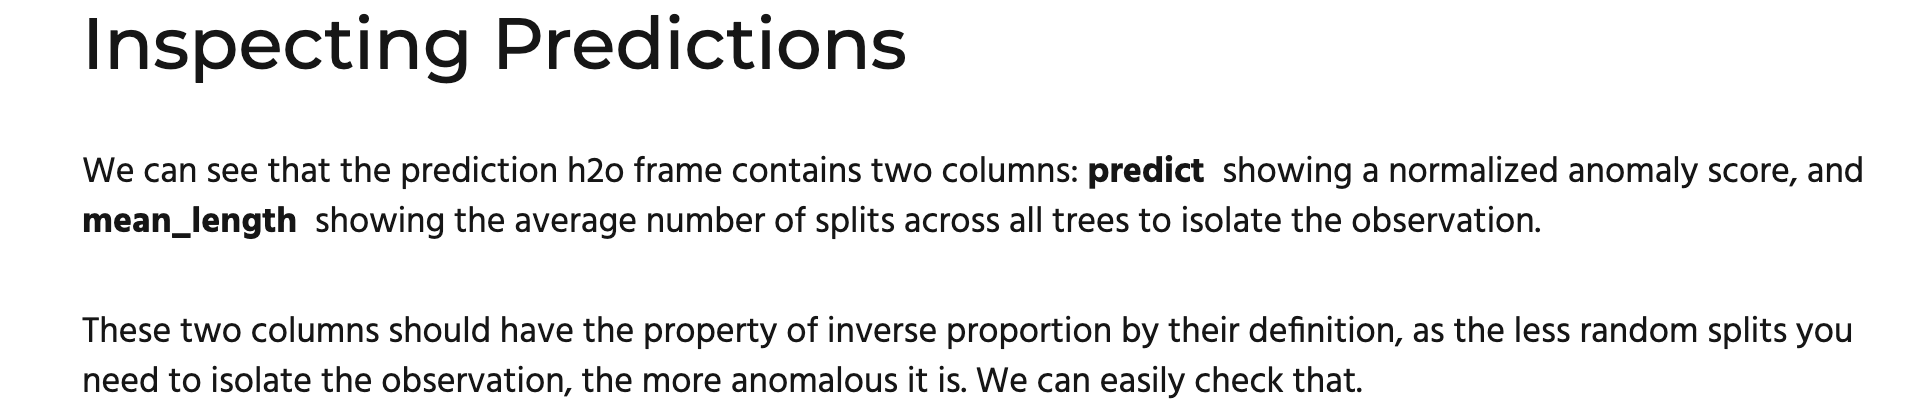

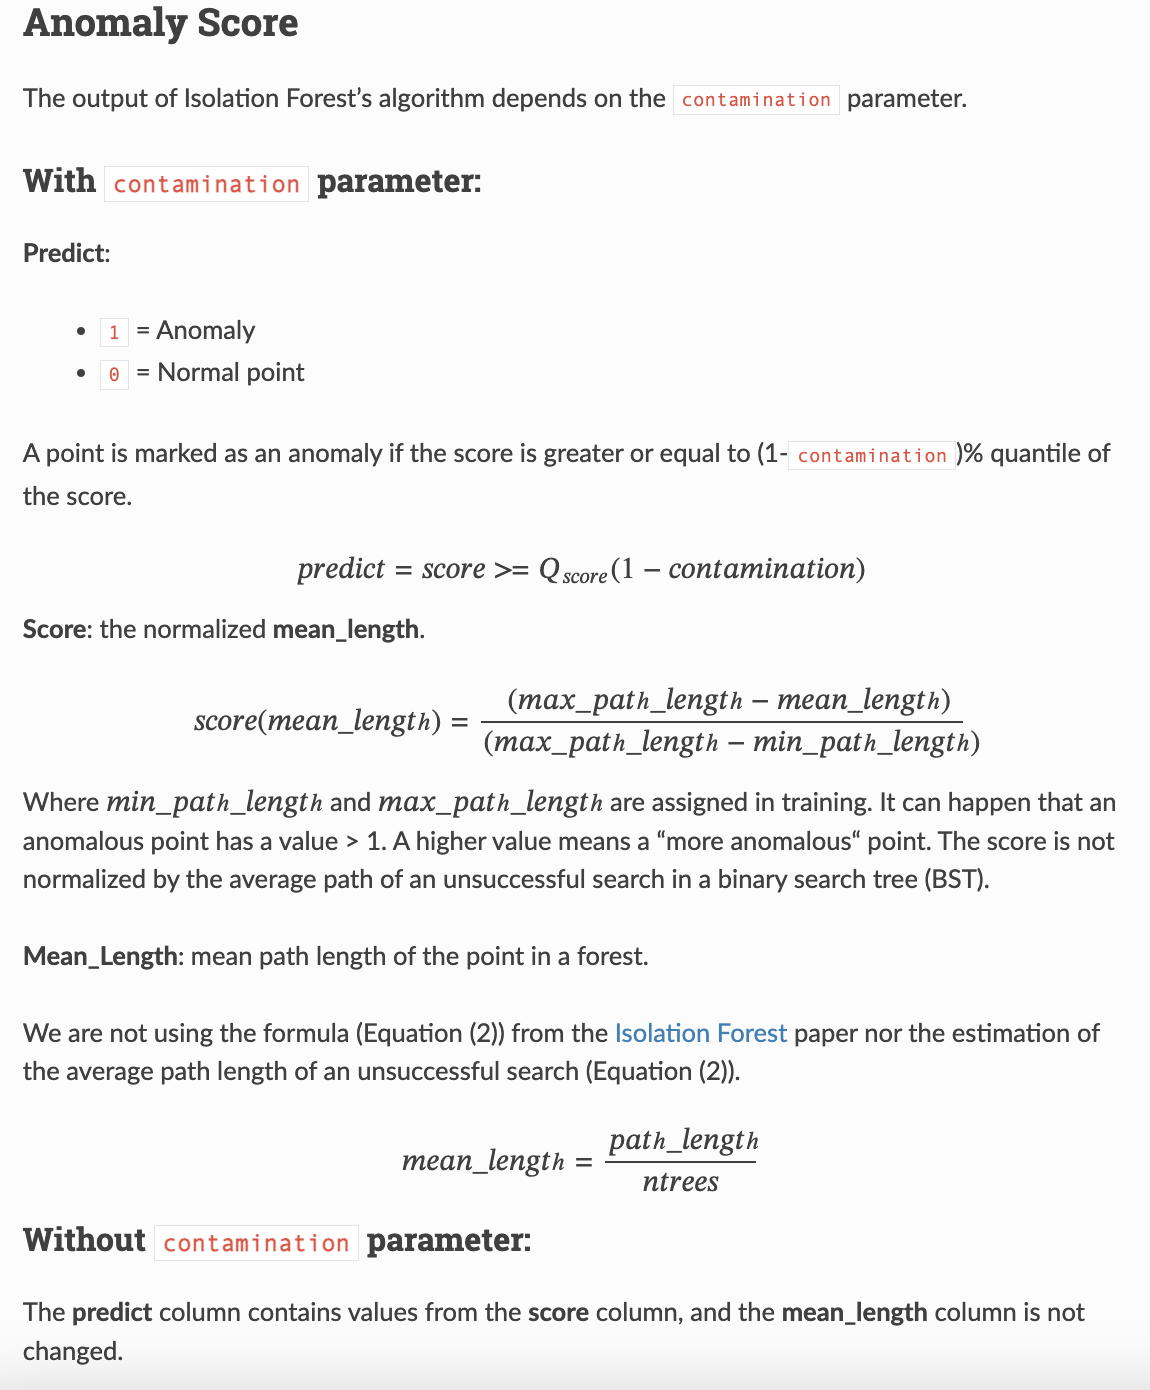

In [301]:
#checking the correlation between the anomaly score and the mean_length
correlation_matrix = predictions[["predict", "mean_length"]].cor(na_rm=True)
correlation = correlation_matrix[0, 1]
print(correlation)

-0.9999999999999537


This shows a perfect negative correlation, as expected

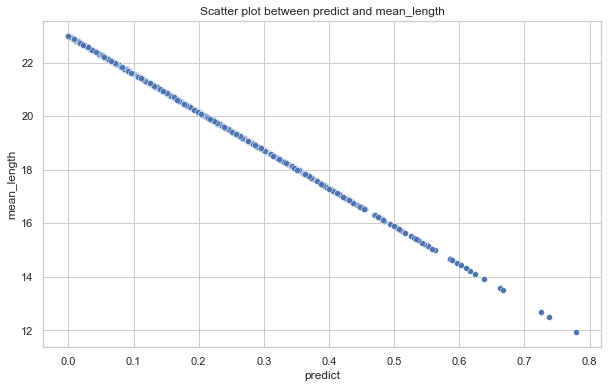

In [302]:
# Convert H2O frame to pandas DataFrame
df_pandas = predictions.as_data_frame()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pandas, x="predict", y="mean_length")
plt.title("Scatter plot between predict and mean_length")
plt.show()

Higher the anomaly score is, lower the mean length. We already know the logic behind isolation forest is that lower the number of splits the tree takes to isolate a certain data point, more anomalous it is. And this plot proves it. 

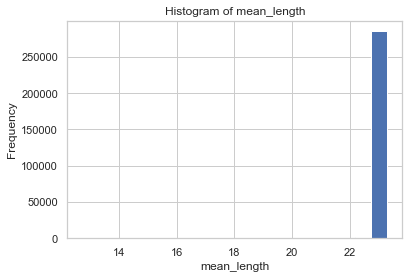

breaks    counts    mids_true      mids     widths
--------  --------  -----------  --------  ---------
 12.4788       nan     nan       nan       nan
 13.0325         1       5.9625   12.7556    0.55375
 13.5862         2       6.25     13.3094    0.55375
 14.14           2       6.75     13.8631    0.55375
 14.6938         2       6.9625   14.4169    0.55375
 15.2475         7       7.1125   14.9706    0.55375
 15.8012         8       7.5      15.5244    0.55375
 16.355         11       7.6375   16.0781    0.55375
 16.9088        16       7.9125   16.6319    0.55375
 17.4625        21       8.2625   17.1856    0.55375
[20 rows x 5 columns]

In [303]:
predictions["mean_length"].hist()

In [305]:
#converting predictions dataframe to calculate the Quatiles, IQR, mean and SD
predictions_df = h2o.as_list(predictions)

Q1 = np.percentile(predictions_df["mean_length"], 25)
Q3 = np.percentile(predictions_df["mean_length"], 75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

mean_length_mean = predictions_df["mean_length"].mean()
mean_length_std = predictions_df["mean_length"].std()

print(f"Mean of 'mean_length': {mean_length_mean}")
print(f"Standard Deviation of 'mean_length': {mean_length_std}")

Q1 (25th percentile): 22.95
Q3 (75th percentile): 23.0
IQR: 0.05000000000000071
Mean of 'mean_length': 22.91286749100146
Standard Deviation of 'mean_length': 0.3240461660707676


Any value that is less than a certain number of standard deviations away from the mean can be considered anomalous. Common thresholds are 2 or 3 standard deviations. In this case we can take 2 deviations below the mean of mean_length to be anomolous. 

In [309]:
## counting number of possible anomalies
anomalies = test[predictions["mean_length"] < 22.3]
print("Number of Anomalies: " + str(anomalies.nrow))

Number of Anomalies: 7727


Roughly around 2.7% of the applications were categorised as possible fraudulant applications in the testing dataset. (7727 out of 30% of the data)

In [310]:
IF_model.predict(anomalies)["mean_length"].cbind(anomalies[anomaly_inputs])

mean_length  ProcessingMethod    LoanStatus      Term    InitialApprovalAmount    CurrentApprovalAmount    ForgivenessAmount  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             CD      JobsReported  NonProfit    BusinessType                     NAICS Industry Description                                                                Size standards in number of employees    UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee  BorrowerCity    BorrowerState    ServicingLenderCity    ServicingLenderState      ServicingLenderLocationID  ProjectCity    ProjectState      OriginatingLenderLocationID  OriginatingLender                      OriginatingLenderCity    OriginatingLenderState      deviant_JR    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount
-------------  ------------------  ------------  ------  -----------------------  -----------------------  -------------------  ---------------------  ------------------  --------------  ---------------------------------  ----  --------------  -----------  -------------------------------  --------------------------------------------------------------------------------------  ---------------------------------------  -------------------  -----------------  ---------------------------  --------------  ------------------------  ---------------------  -----------------------  ---------------------------  --------------------  ---------------------------------  ------------------------------------  ------------------------------------  --------------------------------  ------------------------------  ----------------------------------------  ---------------------------  -------------------------------------  ----------------------------------  ------------------------------------  --------------------------------  --------------  ---------------  ---------------------  ----------------------  ---------------------------  -------------  --------------  -----------------------------  -------------------------------------  -----------------------  ------------------------  ------------  ---------------------------  -------------------------  -----------------------------------  ----------------------  --------------------------------  -----------------------------  -------------------------------  ---------------------------  ----------------------------  -------------------------------  -------------------------------
       18.975  PPP                 PAID IN FULL      60              9.5714e+06               9.53853e+06          9.61588e+06  U                      Y                   Y               EXISTING OR MORE THAN 2 YEARS OLD  AK-              385  N            LIMITED  LIABILITY COMPANY(LLC)  All Other Professional, Scientific and Technical Services                                                               42.0967                    0        9.53853e+06                            0               0                         0                      0                        0             -77353.6                        -32866                       -85.3662                                  24860.8                           

## Global Level Interpretation

In global interpretation, we try to understand why certain data points are considered anomalous.

It will find segments of similar anomalies and discover how to separate them from records that are not anomalies. 

In [321]:
#Create a Copy of the Dataset
global_surrogate_data = test[:, :]
#Add Anomaly Labels
global_surrogate_data["anomaly"] = (predictions["mean_length"] < 22.3).ifelse(1,0)
global_surrogate_data["anomaly"].table()

anomaly    Count
---------  -------
        0   282042
        1     7727
[2 rows x 2 columns]

Creating a new column called "anomaly" in the global_surrogate_data dataframe - For each row in the predictions dataframe, if the mean_length is less than 20, the "anomaly" column will be labeled "Yes", otherwise, it'll be labeled "No". The logic is that if the mean length of number of splits is below 20, it is considered an anomaly.

The goal of training the surrogate decision tree is to understand and interpret the rules or patterns that classify data points as anomalies. By examining the rules of the decision tree, we can gain insights into the conditions that lead to certain data points being labeled as anomalous.

In [322]:
model_id = 'dt_surrogate_mojo'
global_surrogate_dt = H2OIsolationForestEstimator(model_id = model_id, 
                                               ntrees = 1, max_depth = 3,
                                               sample_rate = 1, mtries = 2, seed=SEED)
global_surrogate_dt.train(training_frame = global_surrogate_data, x = anomaly_inputs, y = "anomaly")

Model Details
=============
H2OIsolationForestEstimator : Isolation Forest
Model Key: dt_surrogate_mojo


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  1                           158                    3            3            3             8             8             8

ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: NaN
Normalized Anomaly Score: NaN

Scoring History: 
    timestamp            duration    number_of_trees    mean_tree_path_length    mean_anomaly_score
--  -------------------  ----------  -----------------  -----------------------  --------------------
    2023-11-16 17:18:31  0.004 sec   0                  nan                      nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [323]:
mojo_path = global_surrogate_dt.download_mojo(path='.')
print('Generated MOJO path:\n', mojo_path)

Generated MOJO path:
 /Users/bagyawidanagamage/PracticumProject/dt_surrogate_mojo.zip


In [324]:
# title for plot
title = 'PPP Loan Anomaly Decision Tree Surrogate'  

# locate h2o jar
hs = H2OLocalServer()
h2o_jar_path = hs._find_jar()
print('Discovered H2O jar path:\n', h2o_jar_path)

# construct command line call to generate graphviz version of 
# surrogate tree see for more information: 
# http://docs.h2o.ai/h2o/latest-stable/h2o-genmodel/javadoc/index.html
gv_file_name = model_id + '.gv'
gv_args = str('-cp ' + h2o_jar_path +
              ' hex.genmodel.tools.PrintMojo --tree 0 -i '
              + mojo_path + ' -o').split()
gv_args.insert(0, 'java')
gv_args.append(gv_file_name)
if title is not None:
    gv_args = gv_args + ['--title', title]
    
# call 
print()
print('Calling external process ...')
print(' '.join(gv_args))
# if the line below is failing for you, try instead:
#_ = subprocess.call(gv_args, shell=True)  
_ = subprocess.call(gv_args)


Discovered H2O jar path:
 /opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar

Calling external process ...
java -cp /opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i /Users/bagyawidanagamage/PracticumProject/dt_surrogate_mojo.zip -o dt_surrogate_mojo.gv --title PPP Loan Anomaly Decision Tree Surrogate


In [325]:
#get the .gv file path
gv_file_path = os.path.abspath(gv_file_name)
gv_file_path

'/Users/bagyawidanagamage/PracticumProject/dt_surrogate_mojo.gv'

In [326]:
#dot -Tpng /Users/bagyawidanagamage/PracticumProject/dt_surrogate_mojo.gv -o /Users/bagyawidanagamage/PracticumProject/dt_surrogate_mojo.png

In [327]:
def convert_gv_to_png(input_file, output_file):
    graph = pgv.AGraph(string=open(input_file).read())
    graph.layout(prog='dot')  # Use dot layout engine
    graph.draw(output_file, prog='dot', format='png')

gv_file = "dt_surrogate_mojo.gv"
png_file = "dt_surrogate_mojo.png"
convert_gv_to_png(gv_file, png_file)

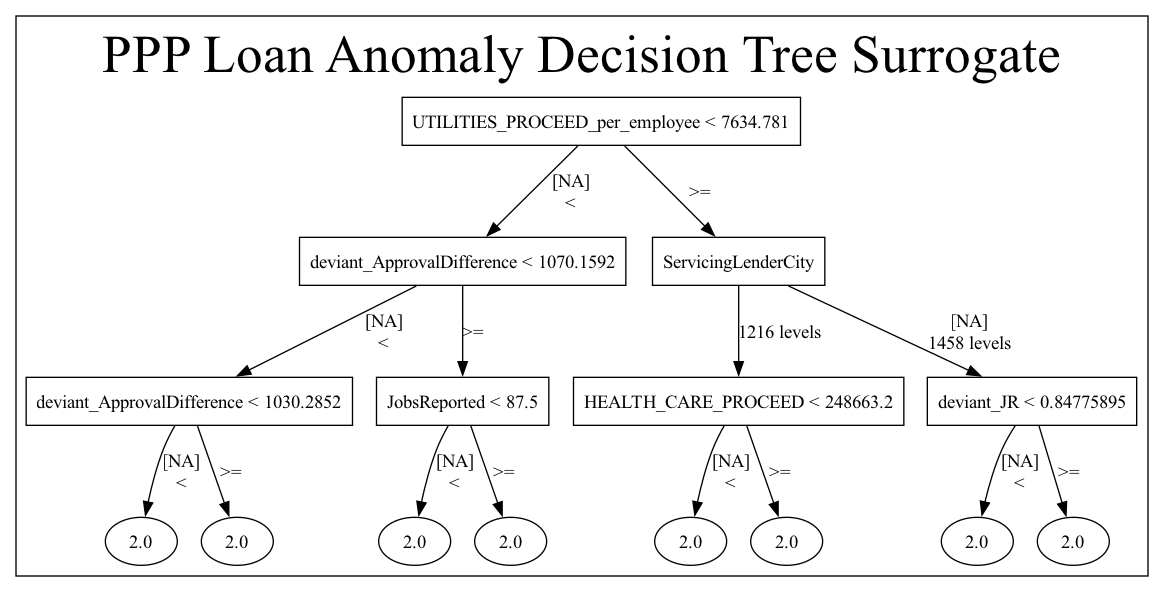

In [358]:
# display in-notebook
from IPython.display import Image
display(Image(png_file))

## EDA with flagged anomalies

In [329]:
eda_predictions = IF_model.predict(ppp_model)
eda_predictions

predict    mean_length
----------  -------------
0.00878735         22.875
0                  23
0.00351494         22.95
0.0140598          22.8
0.0316344          22.55
0.0790861          21.875
0                  23
0                  23
0                  23
0                  23
[965548 rows x 2 columns]

In [330]:
#add anomaly score and mean length to the original dataset
ppp_model["Isolation_Forest_Anomaly_Score"] = eda_predictions["predict"] 
ppp_model["Isolation_Forest_Mean_length"] = eda_predictions["mean_length"] 

In [331]:
ppp_model["anomaly"] = (eda_predictions["mean_length"] < 22.3).ifelse(1, 0)

In [332]:
ppp_model["anomaly"].table()

anomaly    Count
---------  -------
        0   940452
        1    25096
[2 rows x 2 columns]

In [333]:
ppp_model

LoanNumber  DateApproved           SBAOfficeCode  ProcessingMethod    BorrowerName                                      BorrowerAddress        BorrowerCity       BorrowerState      BorrowerZip    LoanStatusDate       LoanStatus      Term    SBAGuarantyPercentage    InitialApprovalAmount    CurrentApprovalAmount    UndisbursedAmount  FranchiseName        ServicingLenderLocationID  ServicingLenderName                    ServicingLenderAddress    ServicingLenderCity    ServicingLenderState      ServicingLenderZip  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             ProjectCity        ProjectCountyName    ProjectState       ProjectZip    CD                   JobsReported    NAICSCode  Race                              Ethnicity                 UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED  BusinessType                OriginatingLenderLocationID  OriginatingLender                      OriginatingLenderCity    OriginatingLenderState    Gender      Veteran      NonProfit      ForgivenessAmount  ForgivenessDate        UTILITIES_PROCEED_purpose    PAYROLL_PROCEED_purpose    MORTGAGE_INTEREST_PROCEED_purpose    RENT_PROCEED_purpose    REFINANCE_EIDL_PROCEED_purpose    HEALTH_CARE_PROCEED_purpose    DEBT_INTEREST_PROCEED_purpose  NAICS Industry Description                                           Size standards in number of employees    Forgiven    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee    Prior PPP count    Prior PPS count    expected_UTILITIES_PROCEED    expected_PAYROLL_PROCEED    expected_MORTGAGE_INTEREST_PROCEED    expected_RENT_PROCEED    expected_REFINANCE_EIDL_PROCEED    expected_HEALTH_CARE_PROCEED    expected_DEBT_INTEREST_PROCEED    expected_ForgivenessAmount    expected_ApprovalDifference    expected_InitialApprovalAmount    expected_CurrentApprovalAmount    deviant_JR    deviant_JR_risk_score    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount    deviant_UTILITIES_PROCEED_risk_score    deviant_PAYROLL_PROCEED_risk_score    deviant_MORTGAGE_INTEREST_PROCEED_risk_score    deviant_RENT_PROCEED_risk_score    deviant_REFINANCE_EIDL_PROCEED_risk_score    deviant_HEALTH_CARE_PROCEED_risk_score    deviant_DEBT_INTEREST_PROCEED_risk_score    deviant_ForgivenessAmount_risk_score    deviant_ApprovalDifference_risk_score    deviant_InitialApprovalAmount_risk_score    deviant_CurrentApprovalAmount_risk_score    average_risk_score  state_name           Isolation_Forest_Anomaly_Score    Isolation_Forest_Mean_length    anomaly
------------  -------------------  ---------------  ------------------  ------------------------------------------------  ---------------------  -----------------  -----------------  -------------  -------------------  ------------  ------  -----------------------  -----------------------  -----------------------  -------------------  -----------------  ---------------------------  -------------------------------------  ------------------------  ---------------------  ----------------------  --------------------  ---------------------  ------------------  --------------  ---------------------------------  -----------------  -------------------  -----------------  ------------  -----------

In [334]:
anomalies_df = ppp_model[ppp_model["anomaly"] == 1]
anomalies_df

LoanNumber  DateApproved           SBAOfficeCode  ProcessingMethod    BorrowerName                           BorrowerAddress                    BorrowerCity       BorrowerState      BorrowerZip    LoanStatusDate       LoanStatus      Term    SBAGuarantyPercentage    InitialApprovalAmount    CurrentApprovalAmount    UndisbursedAmount  FranchiseName        ServicingLenderLocationID  ServicingLenderName                              ServicingLenderAddress           ServicingLenderCity    ServicingLenderState      ServicingLenderZip  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             ProjectCity        ProjectCountyName    ProjectState       ProjectZip    CD                   JobsReported    NAICSCode  Race        Ethnicity            UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED  BusinessType                       OriginatingLenderLocationID  OriginatingLender                                OriginatingLenderCity    OriginatingLenderState    Gender      Veteran      NonProfit      ForgivenessAmount  ForgivenessDate        UTILITIES_PROCEED_purpose    PAYROLL_PROCEED_purpose    MORTGAGE_INTEREST_PROCEED_purpose    RENT_PROCEED_purpose    REFINANCE_EIDL_PROCEED_purpose    HEALTH_CARE_PROCEED_purpose    DEBT_INTEREST_PROCEED_purpose  NAICS Industry Description                                   Size standards in number of employees    Forgiven    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee    Prior PPP count    Prior PPS count    expected_UTILITIES_PROCEED    expected_PAYROLL_PROCEED    expected_MORTGAGE_INTEREST_PROCEED    expected_RENT_PROCEED    expected_REFINANCE_EIDL_PROCEED    expected_HEALTH_CARE_PROCEED    expected_DEBT_INTEREST_PROCEED    expected_ForgivenessAmount    expected_ApprovalDifference    expected_InitialApprovalAmount    expected_CurrentApprovalAmount    deviant_JR    deviant_JR_risk_score    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount    deviant_UTILITIES_PROCEED_risk_score    deviant_PAYROLL_PROCEED_risk_score    deviant_MORTGAGE_INTEREST_PROCEED_risk_score    deviant_RENT_PROCEED_risk_score    deviant_REFINANCE_EIDL_PROCEED_risk_score    deviant_HEALTH_CARE_PROCEED_risk_score    deviant_DEBT_INTEREST_PROCEED_risk_score    deviant_ForgivenessAmount_risk_score    deviant_ApprovalDifference_risk_score    deviant_InitialApprovalAmount_risk_score    deviant_CurrentApprovalAmount_risk_score    average_risk_score  state_name           Isolation_Forest_Anomaly_Score    Isolation_Forest_Mean_length    anomaly
------------  -------------------  ---------------  ------------------  -------------------------------------  ---------------------------------  -----------------  -----------------  -------------  -------------------  ------------  ------  -----------------------  -----------------------  -----------------------  -------------------  -----------------  ---------------------------  -----------------------------------------------  -------------------------------  ---------------------  ----------------------  --------------------  ---------------------  ------------------  --------------  ---------------------------------  -----------------  -------------------  -----------------  -------

In [335]:
#checking the correlation between the manually calculted risk score and risk score calculated by the IF
anomaly_correlation_value = anomalies_df['average_risk_score'].cor(anomalies_df['Isolation_Forest_Anomaly_Score'], method="pearson")
print(anomaly_correlation_value)

0.1695807552257733


In [336]:
non_anomalies_df = ppp_model[ppp_model["anomaly"] == 0]
non_anomalies_df

LoanNumber  DateApproved           SBAOfficeCode  ProcessingMethod    BorrowerName                                      BorrowerAddress        BorrowerCity       BorrowerState      BorrowerZip    LoanStatusDate       LoanStatus      Term    SBAGuarantyPercentage    InitialApprovalAmount    CurrentApprovalAmount    UndisbursedAmount  FranchiseName        ServicingLenderLocationID  ServicingLenderName                    ServicingLenderAddress    ServicingLenderCity    ServicingLenderState      ServicingLenderZip  RuralUrbanIndicator    HubzoneIndicator    LMIIndicator    BusinessAgeDescription             ProjectCity        ProjectCountyName    ProjectState       ProjectZip    CD                   JobsReported    NAICSCode  Race                              Ethnicity                 UTILITIES_PROCEED    PAYROLL_PROCEED    MORTGAGE_INTEREST_PROCEED    RENT_PROCEED    REFINANCE_EIDL_PROCEED    HEALTH_CARE_PROCEED    DEBT_INTEREST_PROCEED  BusinessType                OriginatingLenderLocationID  OriginatingLender                      OriginatingLenderCity    OriginatingLenderState    Gender        Veteran      NonProfit      ForgivenessAmount  ForgivenessDate        UTILITIES_PROCEED_purpose    PAYROLL_PROCEED_purpose    MORTGAGE_INTEREST_PROCEED_purpose    RENT_PROCEED_purpose    REFINANCE_EIDL_PROCEED_purpose    HEALTH_CARE_PROCEED_purpose    DEBT_INTEREST_PROCEED_purpose  NAICS Industry Description                                           Size standards in number of employees    Forgiven    non_forgiven_loan_portion    ApprovalDifference    ApprovalDifference_per_employee    InitialApprovalAmount_per_employee    CurrentApprovalAmount_per_employee    UTILITIES_PROCEED_per_employee    PAYROLL_PROCEED_per_employee    MORTGAGE_INTEREST_PROCEED_per_employee    RENT_PROCEED_per_employee    REFINANCE_EIDL_PROCEED_per_employee    HEALTH_CARE_PROCEED_per_employee    DEBT_INTEREST_PROCEED_per_employee    ForgivenessAmount_per_employee    Prior PPP count    Prior PPS count    expected_UTILITIES_PROCEED    expected_PAYROLL_PROCEED    expected_MORTGAGE_INTEREST_PROCEED    expected_RENT_PROCEED    expected_REFINANCE_EIDL_PROCEED    expected_HEALTH_CARE_PROCEED    expected_DEBT_INTEREST_PROCEED    expected_ForgivenessAmount    expected_ApprovalDifference    expected_InitialApprovalAmount    expected_CurrentApprovalAmount    deviant_JR    deviant_JR_risk_score    deviant_UTILITIES_PROCEED    deviant_PAYROLL_PROCEED    deviant_MORTGAGE_INTEREST_PROCEED    deviant_RENT_PROCEED    deviant_REFINANCE_EIDL_PROCEED    deviant_HEALTH_CARE_PROCEED    deviant_DEBT_INTEREST_PROCEED    deviant_ForgivenessAmount    deviant_ApprovalDifference    deviant_InitialApprovalAmount    deviant_CurrentApprovalAmount    deviant_UTILITIES_PROCEED_risk_score    deviant_PAYROLL_PROCEED_risk_score    deviant_MORTGAGE_INTEREST_PROCEED_risk_score    deviant_RENT_PROCEED_risk_score    deviant_REFINANCE_EIDL_PROCEED_risk_score    deviant_HEALTH_CARE_PROCEED_risk_score    deviant_DEBT_INTEREST_PROCEED_risk_score    deviant_ForgivenessAmount_risk_score    deviant_ApprovalDifference_risk_score    deviant_InitialApprovalAmount_risk_score    deviant_CurrentApprovalAmount_risk_score    average_risk_score  state_name           Isolation_Forest_Anomaly_Score    Isolation_Forest_Mean_length    anomaly
------------  -------------------  ---------------  ------------------  ------------------------------------------------  ---------------------  -----------------  -----------------  -------------  -------------------  ------------  ------  -----------------------  -----------------------  -----------------------  -------------------  -----------------  ---------------------------  -------------------------------------  ------------------------  ---------------------  ----------------------  --------------------  ---------------------  ------------------  --------------  ---------------------------------  -----------------  -------------------  -----------------  ------------  ---------

In [337]:
#checking the correlation between the manually calculted risk score and risk score calculated by the IF
non_anomaly_correlation_value = non_anomalies_df['average_risk_score'].cor(non_anomalies_df['Isolation_Forest_Anomaly_Score'], method="pearson")
print(non_anomaly_correlation_value)

0.27432859833762535


## Observations from the Model

In [338]:
# convert the h20 df to pandas
ppp_model_df = ppp_model.as_data_frame(use_pandas=True)

In [339]:
ppp_model_df.head()

LoanNumber   DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704  1588291200000            464              PPP   
1  9777677704  1588291200000            464              PPP   
2  5791407702  1588291200000           1013              PPP   
3  6223567700  1588291200000            920              PPP   
4  9662437702  1588291200000            101              PPP   

               BorrowerName        BorrowerAddress       BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 HIGHWAY 15 SOUTH             SUMTER   
1     PLEASANT PLACES, INC.    7684 SOUTHRAIL ROAD   NORTH CHARLESTON   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E            SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD     SAN BERNARDINO   
4              AERO BOX LLC      UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

       BorrowerState BorrowerZip  LoanStatusDate    LoanStatus  Term  \
0  UNKNOWN/NOTSTATED       29150   1608249600000  PAID IN FULL    24   
1  UNKNOWN/NOTSTATED       29420   1632787200000  PAID IN FULL    24   
2  UNKNOWN/NOTSTATED       98112   1615939200000  PAID IN FULL    24   
3  UNKNOWN/NOTSTATED       92407   1634342400000  PAID IN FULL    24   
4  UNKNOWN/NOTSTATED       UNKNO   1629158400000  PAID IN FULL    24   

   SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
0                    100              769358.78              769358.78   
1                    100              736927.79              736927.79   
2                    100              691355.00              691355.00   
3                    100              499871.00              499871.00   
4                    100              367437.00              367437.00   

   UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
0               0.00  UNKNOWN/NOTSTATED                      19248   
1               0.00  UNKNOWN/NOTSTATED                      19248   
2               0.00  UNKNOWN/NOTSTATED                       9551   
3               0.00  UNKNOWN/NOTSTATED                       9551   
4               0.00  UNKNOWN/NOTSTATED                      57328   

                     ServicingLenderName   ServicingLenderAddress  \
0                           SYNOVUS BANK            1148 BROADWAY   
1                           SYNOVUS BANK            1148 BROADWAY   
2  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
3  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
4           THE HUNTINGTON NATIONAL BANK            17 S HIGH ST.   

  ServicingLenderCity ServicingLenderState  ServicingLenderZip  \
0            COLUMBUS                   GA               31901   
1            COLUMBUS                   GA               31901   
2           CHARLOTTE                   NC               28202   
3           CHARLOTTE                   NC               28202   
4            COLUMBUS                   OH               43215   

  RuralUrbanIndicator HubzoneIndicator LMIIndicator  \
0                   U                N            N   
1                   U                Y            Y   
2                   U                N            N   
3                   U                N            N   
4                   U                N            N   

              BusinessAgeDescription        ProjectCity  ProjectCountyName  \
0  EXISTING OR MORE THAN 2 YEARS OLD             SUMTER             SUMTER   
1  EXISTING OR MORE THAN 2 YEARS OLD   NORTH CHARLESTON         CHARLESTON   
2    NEW BUSINESS OR 2 YEARS OR LESS            SEATTLE               KING   
3    NEW BUSINESS OR 2 YEARS OR LESS     SAN BERNARDINO     SAN BERNARDINO   
4                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

        ProjectState ProjectZip                 CD  JobsReported  NAICSCode  \
0                 SC      29150              SC-05            62  325510.00   
1                 SC      29420              SC-06            73  561730.00   
2                 WA      98112

In [340]:
ppp_model_df['DateApproved'] = pd.to_datetime(ppp_model_df['DateApproved'], unit='ms')
ppp_model_df['LoanStatusDate'] = pd.to_datetime(ppp_model_df['LoanStatusDate'], unit='ms')
ppp_model_df['ForgivenessDate'] = pd.to_datetime(ppp_model_df['ForgivenessDate'], unit='ms')

In [341]:
ppp_model_df.head()

LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704   2020-05-01            464              PPP   
1  9777677704   2020-05-01            464              PPP   
2  5791407702   2020-05-01           1013              PPP   
3  6223567700   2020-05-01            920              PPP   
4  9662437702   2020-05-01            101              PPP   

               BorrowerName        BorrowerAddress       BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 HIGHWAY 15 SOUTH             SUMTER   
1     PLEASANT PLACES, INC.    7684 SOUTHRAIL ROAD   NORTH CHARLESTON   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E            SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD     SAN BERNARDINO   
4              AERO BOX LLC      UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

       BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0  UNKNOWN/NOTSTATED       29150     2020-12-18  PAID IN FULL    24   
1  UNKNOWN/NOTSTATED       29420     2021-09-28  PAID IN FULL    24   
2  UNKNOWN/NOTSTATED       98112     2021-03-17  PAID IN FULL    24   
3  UNKNOWN/NOTSTATED       92407     2021-10-16  PAID IN FULL    24   
4  UNKNOWN/NOTSTATED       UNKNO     2021-08-17  PAID IN FULL    24   

   SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
0                    100              769358.78              769358.78   
1                    100              736927.79              736927.79   
2                    100              691355.00              691355.00   
3                    100              499871.00              499871.00   
4                    100              367437.00              367437.00   

   UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
0               0.00  UNKNOWN/NOTSTATED                      19248   
1               0.00  UNKNOWN/NOTSTATED                      19248   
2               0.00  UNKNOWN/NOTSTATED                       9551   
3               0.00  UNKNOWN/NOTSTATED                       9551   
4               0.00  UNKNOWN/NOTSTATED                      57328   

                     ServicingLenderName   ServicingLenderAddress  \
0                           SYNOVUS BANK            1148 BROADWAY   
1                           SYNOVUS BANK            1148 BROADWAY   
2  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
3  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
4           THE HUNTINGTON NATIONAL BANK            17 S HIGH ST.   

  ServicingLenderCity ServicingLenderState  ServicingLenderZip  \
0            COLUMBUS                   GA               31901   
1            COLUMBUS                   GA               31901   
2           CHARLOTTE                   NC               28202   
3           CHARLOTTE                   NC               28202   
4            COLUMBUS                   OH               43215   

  RuralUrbanIndicator HubzoneIndicator LMIIndicator  \
0                   U                N            N   
1                   U                Y            Y   
2                   U                N            N   
3                   U                N            N   
4                   U                N            N   

              BusinessAgeDescription        ProjectCity  ProjectCountyName  \
0  EXISTING OR MORE THAN 2 YEARS OLD             SUMTER             SUMTER   
1  EXISTING OR MORE THAN 2 YEARS OLD   NORTH CHARLESTON         CHARLESTON   
2    NEW BUSINESS OR 2 YEARS OR LESS            SEATTLE               KING   
3    NEW BUSINESS OR 2 YEARS OR LESS     SAN BERNARDINO     SAN BERNARDINO   
4                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

        ProjectState ProjectZip                 CD  JobsReported  NAICSCode  \
0                 SC      29150              SC-05            62  325510.00   
1                 SC      29420              SC-06            73  561730.00   
2                 WA      98112              WA-0

In [342]:
#Create a DataFrame for anomalies
ppp_anomaly_df = ppp_model_df[ppp_model_df['anomaly'] == 1]

# Create a DataFrame for non-anomalies
ppp_non_anomaly_df = ppp_model_df[ppp_model_df['anomaly'] == 0]

In [343]:
ppp_model_df.to_csv('ppp_H20IF_model_results.csv', index=False)

### Correlation analysis with IF risk scores

In [344]:
ppp_model_df = pd.read_csv('ppp_H20IF_model_results.csv')

In [345]:
#Create a DataFrame for anomalies
ppp_anomaly_df = ppp_model_df[ppp_model_df['anomaly'] == 1]

# Create a DataFrame for non-anomalies
ppp_non_anomaly_df = ppp_model_df[ppp_model_df['anomaly'] == 0]

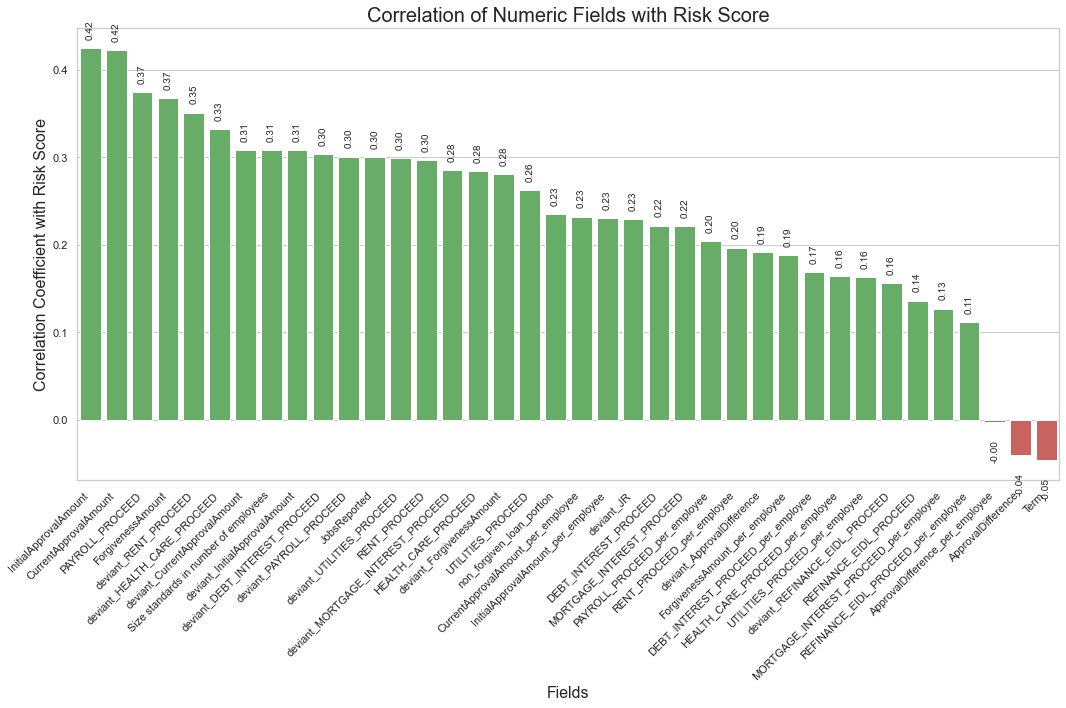

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fields = ppp_model_df[anomaly_inputs]

# Drop non-relevant cat fields for the correlation
numeric_fields = fields.drop(['ProcessingMethod','LoanStatus',
                  'RuralUrbanIndicator','HubzoneIndicator','LMIIndicator','BusinessAgeDescription',
                  'CD','NonProfit','BusinessType','NAICS Industry Description',
                  'BorrowerCity','BorrowerState',
                  'ServicingLenderCity','ServicingLenderState','ServicingLenderLocationID',
                  'ProjectCity','ProjectState',
                  'OriginatingLenderLocationID','OriginatingLender','OriginatingLenderCity','OriginatingLenderState'], axis=1, errors='ignore')  # assume this contains the non-numeric fields you listed

# Calculate the correlation matrix with respect to 'risk_score'
corr_with_risk_score = numeric_fields.corrwith(ppp_model_df['Isolation_Forest_Anomaly_Score']).sort_values(ascending=False)


plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
colors = ["#d9534f" if x < 0 else "#5cb85c" for x in corr_with_risk_score] 
sns.barplot(x=corr_with_risk_score.index, y=corr_with_risk_score, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Numeric Fields with Risk Score', fontsize=20)
plt.xlabel('Fields', fontsize=16)
plt.ylabel('Correlation Coefficient with Risk Score', fontsize=16)

# Add value labels on top of each bar
for index, value in enumerate(corr_with_risk_score):
    if value > 0: 
        plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation=90)
    else:
        plt.text(index, value - 0.02, f'{value:.2f}', ha='center', va='top', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


### Top Borrower States with the highest percentage of possible fraudulant applications 

In [347]:
# Load state population data
population_data = pd.read_csv('NST-EST2022-POP.csv')
state_names = pd.read_csv('us-states-territories.csv', encoding = 'latin1')

# population_date cleaning

# Reset header
header = population_data.iloc[0]
population_data = population_data.iloc[1:]
population_data.columns = header

# Rename columns
population_data.columns = ['state_name', '2020', '2021', '2022']
population_data = population_data[['state_name', '2021']]

# Clean state names
population_data['state_name'] = population_data['state_name'].str.replace('.','')
population_data['state_name'] = population_data['state_name'].str.replace(' ','')
population_data['2021'] = population_data['2021'].str.replace(',','')
population_data.head()


# state name data cleaning
state_names = state_names[['Name', 'Abbreviation']]
state_names['Name'] = state_names['Name'].str.replace('[E]','')
state_names['Name'] = state_names['Name'].str.replace('[F]','')
state_names.rename(columns ={'Name': 'state_name'}, inplace = True)
state_names['state_name'] = state_names['state_name'].str.replace(' ','')


# convert to string
state_names['state_name'] = state_names['state_name'].astype(str)
population_data['state_name'] = population_data['state_name'].astype(str)

# convert back to object
state_names['state_name'] = state_names['state_name'].astype(object)
population_data['state_name'] = population_data['state_name'].astype(object)
population_data['2021'] = population_data['2021'].astype(float)

x = pd.merge(state_names, population_data, on='state_name')
x = x.drop(['state_name'], axis = 1)
x['Abbreviation'] = x['Abbreviation'].str.replace(' ','')

x.rename(columns = {'Abbreviation':'State'}, inplace = True)

x.reset_index(inplace = False)

x.head()

State        2021
0    AL  5049846.00
1    AK   734182.00
2    AZ  7264877.00
3    AR  3028122.00
4    CA 39142991.00

In [348]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   52 non-null     object 
 1   2021    52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [349]:
# Group by both 'state_name' and 'BorrowerState' and aggregate the data
state_analysis = ppp_model_df.groupby(['state_name', 'BorrowerState']).agg({
    'anomaly': ['sum', lambda x: (x == 0).sum()],  # Count anomalies and non-anomalies
    'LoanNumber': 'count'
}).reset_index()

# Flatten the MultiIndex in columns resulting from aggregation
state_analysis.columns = ['state_name', 'BorrowerState', 'anomaly_count', 'non_anomaly_count', 'loan_count']

# Merge with population data based on the 'state_name'
state_analysis = state_analysis.merge(
    x[['State', '2021']], 
    left_on='BorrowerState', 
    right_on='State', 
    how='left'
)

# Calculate the anomaly percentage and non-anomaly percentage relative to the total loans per state
state_analysis['anomaly % total'] = (state_analysis['anomaly_count'] / (state_analysis['anomaly_count'].sum())) * 100
state_analysis['non_anomaly % total'] = (state_analysis['non_anomaly_count'] / (state_analysis['non_anomaly_count'].sum())) * 100

# Calculate the loan percentage for each state_name and BorrowerState combination relative to the total loans
total_loans = state_analysis['loan_count'].sum()

# Calculate the fraud percentage and fraud per 100k population
state_analysis['anomaly % per state'] = (state_analysis['anomaly_count'] / state_analysis['loan_count']) * 100 
state_analysis['normal % per state'] = (state_analysis['non_anomaly_count'] / state_analysis['loan_count']) * 100 

# Create new columns for normalized counts per 100,000 people
state_analysis['normal per 100k'] = (state_analysis['non_anomaly_count'] / state_analysis['2021']) * 100000
state_analysis['anomaly per 100k'] = (state_analysis['anomaly_count'] / state_analysis['2021']) * 100000

# Create rank columns for normal and anomalous loans per 100,000 people
state_analysis['normal_rank'] = state_analysis['normal per 100k'].rank(ascending=False)
state_analysis['anomalous_rank'] = state_analysis['anomaly per 100k'].rank(ascending=False)

# The lower the rank_score, the more anomalous the state
state_analysis['rank_score'] = state_analysis['normal_rank']/state_analysis['anomalous_rank']

# Sort the data by 'fraud % per state' in descending order
state_analysis = state_analysis.sort_values(by='anomaly % total', ascending=False).reset_index(drop=True)

# Display the DataFrame
state_analysis

state_name      BorrowerState  anomaly_count  non_anomaly_count  \
0          California                 CA           3663             125421   
1               Texas                 TX           2131              73930   
2            New York                 NY           1637              72182   
3             Florida                 FL           1157              58845   
4            Illinois                 IL           1140              39623   
5           Wisconsin                 WI            862              16484   
6            Michigan                 MI            809              28982   
7                Ohio                 OH            774              31865   
8          Washington                 WA            743              22876   
9        Pennsylvania                 PA            740              37759   
10            Alabama                 AL            646              10266   
11         New Jersey                 NJ            597              31918   
12            Georgia                 GA            590              25197   
13           Virginia                 VA            565              22659   
14      Massachusetts                 MA            521              26658   
15            Arizona                 AZ            509              15248   
16            Indiana                 IN            501              16093   
17           Colorado                 CO            490              19179   
18          Minnesota                 MN            463              19257   
19           Oklahoma                 OK            405               9590   
20          Tennessee                 TN            403              15461   
21           Missouri                 MO            398              15941   
22     North Carolina                 NC            376              22420   
23             Alaska                 AK            341               2321   
24           Maryland                 MD            332              18623   
25          Louisiana                 LA            304              13365   
26            Wyoming                 WY            296               1840   
27        Connecticut                 CT            278              12604   
28               Iowa                 IA            275               8020   
29           Arkansas                 AR            249               5608   
30               Utah                 UT            239               9019   
31             Oregon                 OR            237              13166   
32     South Carolina                 SC            233              10506   
33           Kentucky                 KY            212               8966   
34             Kansas                 KS            200               8001   
35             Nevada                 NV            191               8063   
36        Mississippi                 MS            182               5322   
37      West Virginia                 WV            159               3206   
38  UNKNOWN/NOTSTATED                 PR            131               2821   
39              Idaho                 ID            114               4301   
40           Nebraska                 NE            108               5695   
41         New Mexico                 NM            102               4380   
42  UNKNOWN/NOTSTATED                 DC             95               4288   
43       North Dakota                 ND             94               3128   
44      New Hampshire                 NH             92               4977   
45       South Dakota                 SD             92               2603   
46            Vermont                 VT             87               2178   
47       Rhode Island                 RI             84               3702   
48           Delaware                 DE             78               2912   
49              Maine                 ME             66               4119   
50            Montana            

In [350]:
state_analysis.to_csv('state_analysis.csv', index=False)

In [351]:
(state_analysis['anomaly_count'].sum())

25096

In [352]:
(state_analysis['non_anomaly_count'].sum())

940452

In [353]:
state_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_name           57 non-null     object 
 1   BorrowerState        57 non-null     object 
 2   anomaly_count        57 non-null     int64  
 3   non_anomaly_count    57 non-null     int64  
 4   loan_count           57 non-null     int64  
 5   State                52 non-null     object 
 6   2021                 52 non-null     float64
 7   anomaly % total      57 non-null     float64
 8   non_anomaly % total  57 non-null     float64
 9   anomaly % per state  57 non-null     float64
 10  normal % per state   57 non-null     float64
 11  normal per 100k      52 non-null     float64
 12  anomaly per 100k     52 non-null     float64
 13  normal_rank          52 non-null     float64
 14  anomalous_rank       52 non-null     float64
 15  rank_score           52 non-null     float

States with smaller populations or less economic activity may show higher percentages of anomalies simply because a single irregularity represents a larger portion of the data set

The fraud rate per capita is a statistical measure that indicates how many fraud cases (anomalies) there are in a state per 100,000 residents. It normalizes the absolute number of fraud cases to the size of the population, allowing for a comparison between states of different sizes. This is particularly useful because it provides a sense of scale and context when considering the impact and prevalence of fraud within a given area.

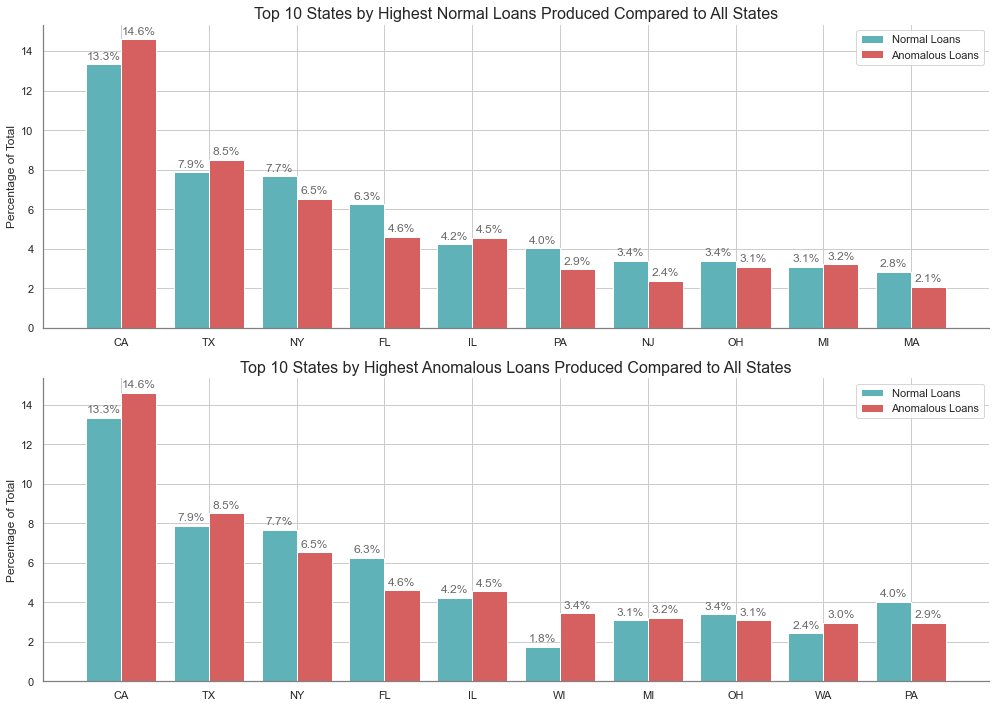

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sort the data for top 10 states based on 'non_anomaly % total' and 'anomaly % total'
top_10_normal = state_analysis.sort_values(by='non_anomaly % total', ascending=False).head(10)
top_10_anomaly = state_analysis.sort_values(by='anomaly % total', ascending=False).head(10)


normal_color = '#5fb2b8'  
anomaly_color = '#d66060'  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))  # Two subplots
bar_width = 0.4

# Plotting the first subplot (top 10 normal % total)
ind1 = range(len(top_10_normal))

# Plot bars for the first subplot
normal_bars1 = ax1.bar(ind1, top_10_normal['non_anomaly % total'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color)


for bar in normal_bars1 + anomaly_bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color='dimgrey')

ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(top_10_normal['BorrowerState'], rotation=0, ha='center')
ax1.set_title('Top 10 States by Highest Normal Loans Produced Compared to All States', fontsize=16)
ax1.set_ylabel('Percentage of Total', fontsize=12)
ax1.legend()

# Plotting the second subplot (top 10 anomaly % total)
ind2 = range(len(top_10_anomaly))

# Plot bars for the second subplot
normal_bars2 = ax2.bar(ind2, top_10_anomaly['non_anomaly % total'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color)


for bar in normal_bars2 + anomaly_bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color='dimgrey')


ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(top_10_anomaly['BorrowerState'], rotation=0, ha='center')
ax2.set_title('Top 10 States by Highest Anomalous Loans Produced Compared to All States', fontsize=16)
ax2.set_ylabel('Percentage of Total', fontsize=12)
ax2.legend()


for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True)  


plt.tight_layout()
plt.show()

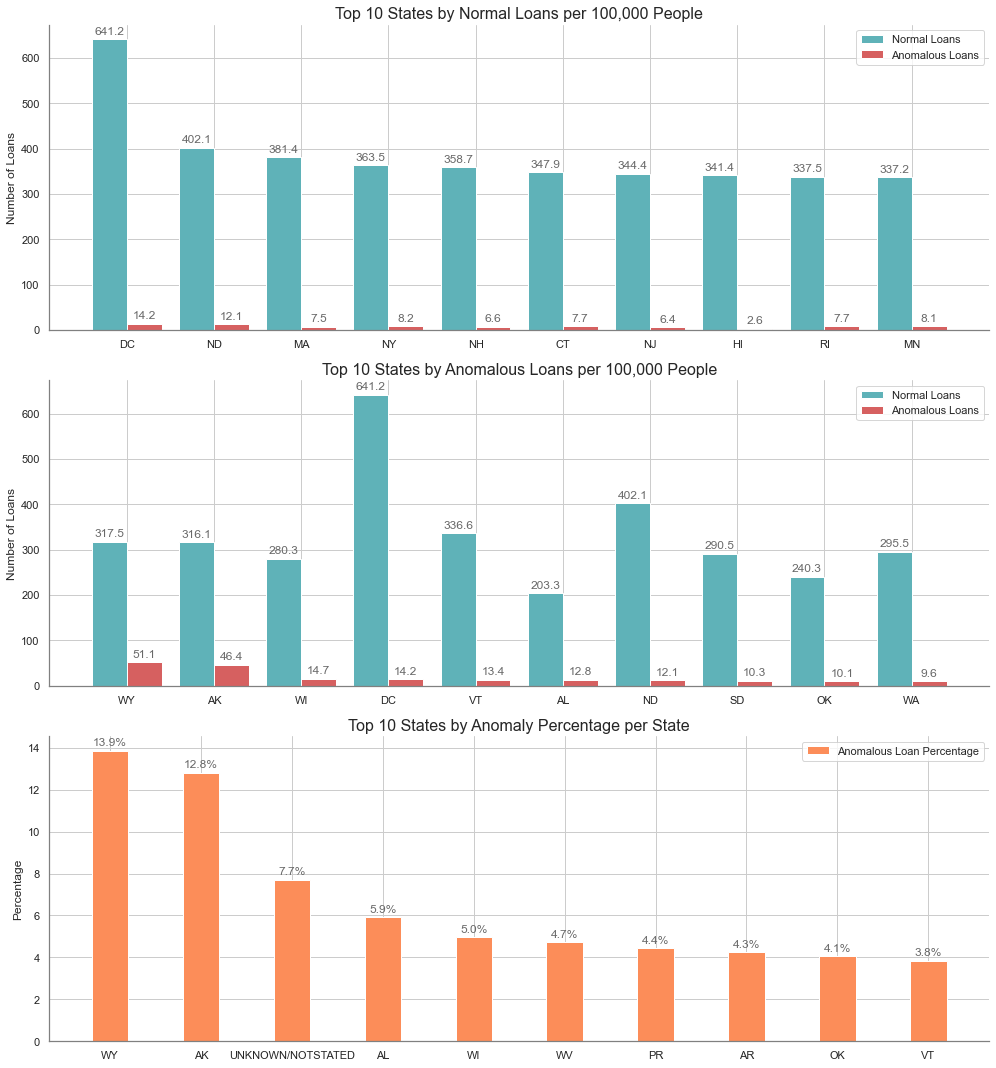

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sort the data for top 10 states based on 'normal per 100k', 'anomaly per 100k', and 'anomaly % per state'
top_10_normal = state_analysis.sort_values(by='normal per 100k', ascending=False).head(10)
top_10_anomaly = state_analysis.sort_values(by='anomaly per 100k', ascending=False).head(10)
top_10_anomaly_percent = state_analysis.sort_values(by='anomaly % per state', ascending=False).head(10)


normal_color = '#5fb2b8'
anomaly_color = '#d66060'
anomaly_percent_color = '#fc8d59'

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15))  # Three subplots
bar_width = 0.4

def add_labels(bars, axis, is_percentage=False):
    for bar in bars:
        height = bar.get_height()
        label_format = f'{height:.1f}%'
        label_format = label_format if is_percentage else f'{height:.1f}'
        axis.annotate(label_format,
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3), 
                      textcoords="offset points",
                      ha='center', va='bottom',
                      color='dimgrey')

# Plotting the first subplot (top 10 normal per 100k)
ind1 = range(len(top_10_normal))
normal_bars1 = ax1.bar(ind1, top_10_normal['normal per 100k'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly per 100k'], bar_width, label='Anomalous Loans', color=anomaly_color)
add_labels(normal_bars1, ax1)
add_labels(anomaly_bars1, ax1)

# Plotting the second subplot (top 10 anomaly per 100k)
ind2 = range(len(top_10_anomaly))
normal_bars2 = ax2.bar(ind2, top_10_anomaly['normal per 100k'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly per 100k'], bar_width, label='Anomalous Loans', color=anomaly_color)
add_labels(normal_bars2, ax2)
add_labels(anomaly_bars2, ax2)

# Plotting the third subplot (top 10 anomaly % per state)
ind3 = range(len(top_10_anomaly_percent))
anomaly_percent_bars3 = ax3.bar(ind3, top_10_anomaly_percent['anomaly % per state'], bar_width, label='Anomalous Loan Percentage', color=anomaly_percent_color)
add_labels(anomaly_percent_bars3, ax3, is_percentage=True)

# Set x-axis ticks and labels for all subplots
ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(top_10_normal['BorrowerState'], rotation=0, ha='center')
ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(top_10_anomaly['BorrowerState'], rotation=0, ha='center')
ax3.set_xticks(ind3)
ax3.set_xticklabels(top_10_anomaly_percent['BorrowerState'], rotation=0, ha='center')

# Set titles and labels for all subplots
ax1.set_title('Top 10 States by Normal Loans per 100,000 People', fontsize=16)
ax1.set_ylabel('Number of Loans', fontsize=12)
ax2.set_title('Top 10 States by Anomalous Loans per 100,000 People', fontsize=16)
ax2.set_ylabel('Number of Loans', fontsize=12)
ax3.set_title('Top 10 States by Anomaly Percentage per State', fontsize=16)
ax3.set_ylabel('Percentage', fontsize=12)

# Add legends to all subplots
ax1.legend()
ax2.legend()
ax3.legend()


for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True) 


plt.tight_layout()
plt.show()


The consistent high ranking for Alaska, Wyoming, and Wisconsin across both metrics might imply that not only are anomalies frequently detected in these states, but they also translate into a high rate of fraud cases when normalized by population size.

In [356]:
worst_rank_scores = state_analysis.sort_values(by='rank_score', ascending=False).reset_index(drop=True).head(10)
worst_rank_scores[['BorrowerState','non_anomaly_count', 'anomaly_count', 'normal per 100k', 'anomaly per 100k', 'normal_rank', 'anomalous_rank', 'rank_score', 'anomaly % per state', 'normal % per state']]

BorrowerState  non_anomaly_count  anomaly_count  normal per 100k  \
0            WY               1840            296           317.52   
1            WI              16484            862           280.34   
2            AL              10266            646           203.29   
3            AK               2321            341           316.13   
4            OK               9590            405           240.28   
5            WV               3206            159           179.55   
6            AR               5608            249           185.20   
7            SD               2603             92           290.46   
8            IA               8020            275           250.81   
9            VT               2178             87           336.65   

   anomaly per 100k  normal_rank  anomalous_rank  rank_score  \
0             51.08        14.00            1.00       14.00   
1             14.66        27.00            3.00        9.00   
2             12.79        46.00            6.00        7.67   
3             46.45        15.00            2.00        7.50   
4             10.15        38.00            9.00        4.22   
5              8.90        51.00           13.00        3.92   
6              8.22        49.00           17.00        2.88   
7             10.27        21.00            8.00        2.62   
8              8.60        36.00           14.00        2.57   
9             13.45        11.00            5.00        2.20   

   anomaly % per state  normal % per state  
0                13.86               86.14  
1                 4.97               95.03  
2                 5.92               94.08  
3                12.81               87.19  
4                 4.05               95.95  
5                 4.73               95.27  
6                 4.25               95.75  
7                 3.41               96.59  
8                 3.32               96.68  
9                 3.84               96.16

In [357]:
print("Median states number of anomalous loans as a % of total loans for all states: ", round(state_analysis['anomaly % per state'].median(), 1),"%")
print("\nMedian number of normal loans as a % of total loans for all states: ", round(state_analysis['normal % per state'].median(), 1),"%")
print("\nAlaska number of anomalous loans as a % of total loans: ", round(worst_rank_scores['anomaly % per state'][worst_rank_scores['BorrowerState']=="AK"].values[0],1), "%")
print("\nAlabama number of anomalous loans as a % of total loans: ", round(worst_rank_scores['anomaly % per state'][worst_rank_scores['BorrowerState']=="AL"].values[0],1), "%")
print("\nWisconsin number of anomalous loans as a % of total loans: ", round(worst_rank_scores['anomaly % per state'][worst_rank_scores['BorrowerState']=="WI"].values[0],1), "%")
print("\nWyoming number of anomalous loans as a % of total loans: ", round(worst_rank_scores['anomaly % per state'][worst_rank_scores['BorrowerState']=="WY"].values[0],1), "%")
print("\nWest Virginia number of anomalous loans as a % of total loans: ", round(worst_rank_scores['anomaly % per state'][worst_rank_scores['BorrowerState']=="WV"].values[0],1), "%")

Median states number of anomalous loans as a % of total loans for all states:  2.4 %

Median number of normal loans as a % of total loans for all states:  97.6 %

Alaska number of anomalous loans as a % of total loans:  12.8 %

Alabama number of anomalous loans as a % of total loans:  5.9 %

Wisconsin number of anomalous loans as a % of total loans:  5.0 %

Wyoming number of anomalous loans as a % of total loans:  13.9 %

West Virginia number of anomalous loans as a % of total loans:  4.7 %


Worst 5 states had a much higher percentage of anomalous loans within the state compared to the percentage of total loans across all states.

### Top Servicing Lender States with the highest percentage of possible fraudulant applications

In [359]:
# Group by both 'state_name' and 'BorrowerState' and aggregate the data
Lenderstate_analysis = ppp_model_df.groupby(['ServicingLenderState']).agg({
    'anomaly': ['sum', lambda x: (x == 0).sum()],  # Count anomalies and non-anomalies
    'LoanNumber': 'count'
}).reset_index()

# Flatten the MultiIndex in columns resulting from aggregation
Lenderstate_analysis.columns = ['ServicingLenderState', 'anomaly_count', 'non_anomaly_count', 'loan_count']

# Merge with population data based on the 'state_name'
Lenderstate_analysis = Lenderstate_analysis.merge(
    x[['State', '2021']], 
    left_on='ServicingLenderState', 
    right_on='State', 
    how='left'
)

# Calculate the anomaly percentage and non-anomaly percentage relative to the total loans per state
Lenderstate_analysis['anomaly % total'] = (Lenderstate_analysis['anomaly_count'] / (Lenderstate_analysis['anomaly_count'].sum())) * 100
Lenderstate_analysis['non_anomaly % total'] = (Lenderstate_analysis['non_anomaly_count'] / (Lenderstate_analysis['non_anomaly_count'].sum())) * 100

# Calculate the loan percentage for each state_name and BorrowerState combination relative to the total loans
total_loans = Lenderstate_analysis['loan_count'].sum()

# Calculate the fraud percentage and fraud per 100k population
Lenderstate_analysis['anomaly % per state'] = (Lenderstate_analysis['anomaly_count'] / Lenderstate_analysis['loan_count']) * 100 
Lenderstate_analysis['normal % per state'] = (Lenderstate_analysis['non_anomaly_count'] / Lenderstate_analysis['loan_count']) * 100 

# Create new columns for normalized counts per 100,000 people
Lenderstate_analysis['normal per 100k'] = (Lenderstate_analysis['non_anomaly_count'] / Lenderstate_analysis['2021']) * 100000
Lenderstate_analysis['anomaly per 100k'] = (Lenderstate_analysis['anomaly_count'] / Lenderstate_analysis['2021']) * 100000

# Create rank columns for normal and anomalous loans per 100,000 people
Lenderstate_analysis['normal_rank'] = Lenderstate_analysis['normal per 100k'].rank(ascending=False)
Lenderstate_analysis['anomalous_rank'] = Lenderstate_analysis['anomaly per 100k'].rank(ascending=False)

# The lower the rank_score, the more anomalous the state
Lenderstate_analysis['rank_score'] = Lenderstate_analysis['normal_rank']/Lenderstate_analysis['anomalous_rank']

# Sort the data by 'fraud % per state' in descending order
Lenderstate_analysis = Lenderstate_analysis.sort_values(by='anomaly % total', ascending=False).reset_index(drop=True)

# Display the DataFrame
Lenderstate_analysis

ServicingLenderState  anomaly_count  non_anomaly_count  loan_count State  \
0                    OH           3436             120588      124024    OH   
1                    CA           1926              56053       57979    CA   
2                    NY           1557              59674       61231    NY   
3                    DE           1415              43196       44611    DE   
4                    TX           1405              52553       53958    TX   
5                    NC           1237              76175       77412    NC   
6                    IL           1194              38643       39837    IL   
7                    UT            826              28409       29235    UT   
8                    WI            743              13776       14519    WI   
9                    PA            628              38496       39124    PA   
10                   AL            594              12837       13431    AL   
11                   WA            591              14186       14777    WA   
12                   FL            578              25564       26142    FL   
13                   SD            536              24470       25006    SD   
14                   VA            487              20991       21478    VA   
15                   OK            463              15616       16079    OK   
16                   MO            457              19049       19506    MO   
17                   TN            440              18427       18867    TN   
18                   IN            430              16997       17427    IN   
19                   NJ            401              25368       25769    NJ   
20                   MA            384              18875       19259    MA   
21                   GA            376              17998       18374    GA   
22                   MS            375              14492       14867    MS   
23                   MI            364              10689       11053    MI   
24                   AR            355              10592       10947    AR   
25                   MN            334              13843       14177    MN   
26                   CO            326              11509       11835    CO   
27                   IA            326               8378        8704    IA   
28                   AK            282               1915        2197    AK   
29                   AZ            273               4053        4326    AZ   
30                   LA            242               7979        8221    LA   
31                   CT            187               7156        7343    CT   
32                   RI            161               9740        9901    RI   
33                   WY            160                853        1013    WY   
34                   KS            159               7512        7671    KS   
35                   MT            158               8062        8220    MT   
36                   PR            157               3124        3281    PR   
37                   OR            131               8808        8939    OR   
38                   WV            127               3367        3494    WV   
39                   NE            127               7252        7379    NE   
40                   KY            123               7313        7436    KY   
41                   ND            121               5264        5385    ND   
42                   ID             75               3535        3610    ID   
43                   NV             65               1583        1648    NV   
44                   MD             65               7057        7122    MD   
45                   NM             64               3040        3104    NM   
46                   VT             62               1036        1098    VT   
47                   SC             55               2890        2945    SC   
48                   ME             49               3652        3701    ME   
49                   HI             32               

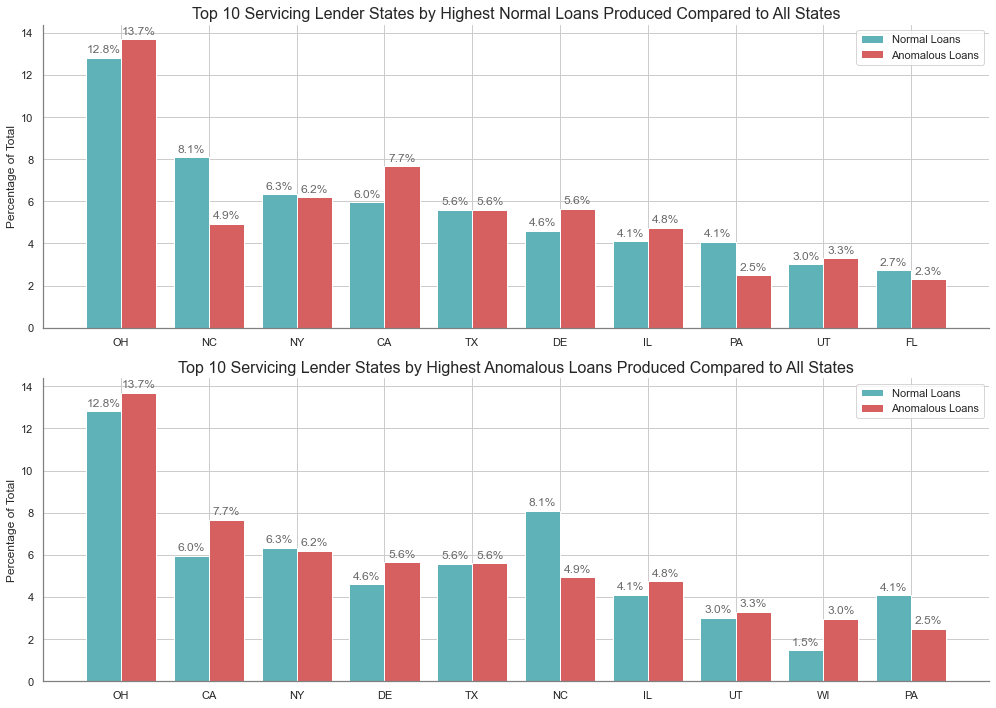

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Sort the data for top 10 states based on 'non_anomaly % total' and 'anomaly % total'
top_10_normal = Lenderstate_analysis.sort_values(by='non_anomaly % total', ascending=False).head(10)
top_10_anomaly = Lenderstate_analysis.sort_values(by='anomaly % total', ascending=False).head(10)


normal_color = '#5fb2b8'  
anomaly_color = '#d66060'  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))  # Two subplots
bar_width = 0.4

# Plotting the first subplot (top 10 normal % total)
ind1 = range(len(top_10_normal))

# Plot bars for the first subplot
normal_bars1 = ax1.bar(ind1, top_10_normal['non_anomaly % total'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color)


for bar in normal_bars1 + anomaly_bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color='dimgrey')

ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(top_10_normal['State'], rotation=0, ha='center')
ax1.set_title('Top 10 Servicing Lender States by Highest Normal Loans Produced Compared to All States', fontsize=16)
ax1.set_ylabel('Percentage of Total', fontsize=12)
ax1.legend()

# Plotting the second subplot (top 10 anomaly % total)
ind2 = range(len(top_10_anomaly))

# Plot bars for the second subplot
normal_bars2 = ax2.bar(ind2, top_10_anomaly['non_anomaly % total'], bar_width, label='Normal Loans', color=normal_color)
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color)


for bar in normal_bars2 + anomaly_bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom',
                 color='dimgrey')


ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(top_10_anomaly['State'], rotation=0, ha='center')
ax2.set_title('Top 10 Servicing Lender States by Highest Anomalous Loans Produced Compared to All States', fontsize=16)
ax2.set_ylabel('Percentage of Total', fontsize=12)
ax2.legend()


for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True)  


plt.tight_layout()
plt.show()

### Industries with the highest percentage of possible fraudulant applications 

In [361]:
# Industry analysis
anomalous_naics_counts = pd.DataFrame(ppp_anomaly_df['NAICS Industry Description'].value_counts())
anomalous_naics_counts['anomaly % total'] = (anomalous_naics_counts['count']/(anomalous_naics_counts['count'].sum()))*100
anomalous_naics_counts.head(10)

count  anomaly % total
NAICS Industry Description                                                
UNKNOWN/NOTSTATED                                    1030             4.10
New Car Dealers                                       509             2.03
Full-Service Restaurants                              419             1.67
Couriers and Express Delivery Services                414             1.65
Limited-Service Restaurants                           353             1.41
Offices of Physicians (except Mental Health Spe...    296             1.18
Commercial Printing (except Screen and Books)         267             1.06
Hotels (except Casino Hotels) and Motels              256             1.02
Offices of Lawyers                                    243             0.97
General Medical and Surgical Hospitals                234             0.93

In [362]:
# Industry analysis
normal_loans_naics_counts = pd.DataFrame(ppp_non_anomaly_df['NAICS Industry Description'].value_counts())
normal_loans_naics_counts['normal % total'] = (normal_loans_naics_counts['count']/(normal_loans_naics_counts['count'].sum()))*100
normal_loans_naics_counts.head(10)

count  normal % total
NAICS Industry Description                                               
Full-Service Restaurants                            76132            8.10
UNKNOWN/NOTSTATED                                   75028            7.98
Offices of Physicians (except Mental Health Spe...  28013            2.98
Offices of Lawyers                                  19750            2.10
Hotels (except Casino Hotels) and Motels            18944            2.01
Plumbing, Heating, and Air‑Conditioning Contrac...  18176            1.93
Offices of Dentists                                 17460            1.86
Commercial and Institutional Building Construction  17196            1.83
Limited-Service Restaurants                         14980            1.59
Electrical Contractors and Other Wiring Install...  14940            1.59

In [363]:
naics = pd.merge(normal_loans_naics_counts,anomalous_naics_counts, on = 'NAICS Industry Description')
naics.head(10)

count_x  normal % total  \
NAICS Industry Description                                                    
Full-Service Restaurants                              76132            8.10   
UNKNOWN/NOTSTATED                                     75028            7.98   
Offices of Physicians (except Mental Health Spe...    28013            2.98   
Offices of Lawyers                                    19750            2.10   
Hotels (except Casino Hotels) and Motels              18944            2.01   
Plumbing, Heating, and Air‑Conditioning Contrac...    18176            1.93   
Offices of Dentists                                   17460            1.86   
Commercial and Institutional Building Construction    17196            1.83   
Limited-Service Restaurants                           14980            1.59   
Electrical Contractors and Other Wiring Install...    14940            1.59   

                                                    count_y  anomaly % total  
NAICS Industry Description                                                    
Full-Service Restaurants                                419             1.67  
UNKNOWN/NOTSTATED                                      1030             4.10  
Offices of Physicians (except Mental Health Spe...      296             1.18  
Offices of Lawyers                                      243             0.97  
Hotels (except Casino Hotels) and Motels                256             1.02  
Plumbing, Heating, and Air‑Conditioning Contrac...      188             0.75  
Offices of Dentists                                     158             0.63  
Commercial and Institutional Building Construction      177             0.71  
Limited-Service Restaurants                             353             1.41  
Electrical Contractors and Other Wiring Install...      181             0.72

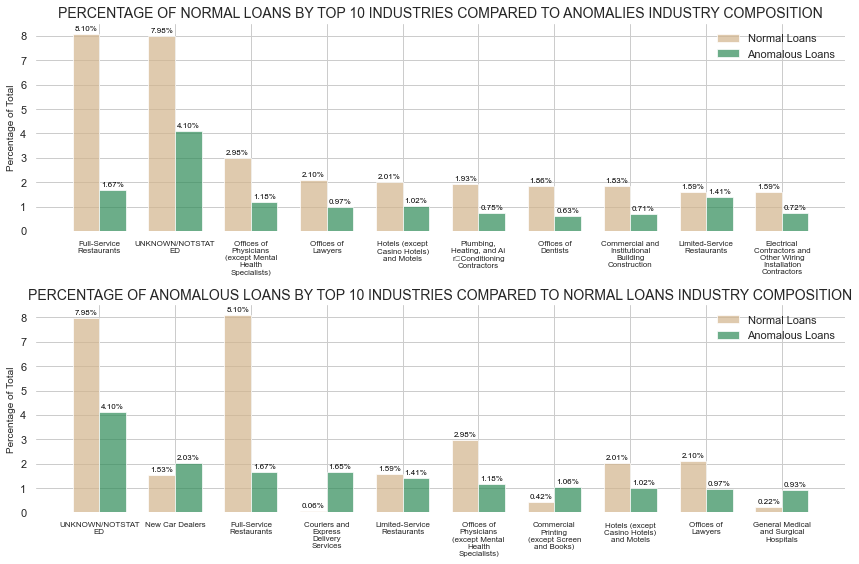

In [364]:
import textwrap 

# Set custom colors for the bars
normal_color = 'tan'
anomaly_color = 'seagreen'

# Set the size of the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # Two subplots

# Bar width
bar_width = 0.35

# Plotting the first subplot (top 10 normal % total)
top_10_normal = naics.sort_values(by='normal % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind1 = range(len(top_10_normal))

# Plot normal % total bars with custom color
normal_bars1 = ax1.bar(ind1, top_10_normal['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed
wrapped_labels1 = [textwrap.fill(label, width=15) for label in top_10_normal.index]

# X-axis ticks and labels for the first subplot
ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(wrapped_labels1, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the first subplot
for i, value in enumerate(top_10_normal['normal % total']):
    ax1.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_normal['anomaly % total']):
    ax1.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the first subplot
ax1.legend(frameon=False)

# Remove graph border for the first subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the first subplot
ax1.set_ylabel('Percentage of Total', fontsize=10)
ax1.set_title('PERCENTAGE OF NORMAL LOANS BY TOP 10 INDUSTRIES COMPARED TO ANOMALIES INDUSTRY COMPOSITION', fontsize=14)
# Plotting the second subplot (top 10 anomaly % total)
top_10_anomaly = naics.sort_values(by='anomaly % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind2 = range(len(top_10_anomaly))

# Plot normal % total bars with custom color for the second subplot
normal_bars2 = ax2.bar(ind2, top_10_anomaly['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color for the second subplot
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed for the second subplot
wrapped_labels2 = [textwrap.fill(label, width=15) for label in top_10_anomaly.index]

# X-axis ticks and labels for the second subplot
ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(wrapped_labels2, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the second subplot
for i, value in enumerate(top_10_anomaly['normal % total']):
    ax2.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_anomaly['anomaly % total']):
    ax2.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the second subplot
ax2.legend(frameon=False)

# Remove graph border for the second subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the second subplot
ax2.set_ylabel('Percentage of Total', fontsize=10)
ax2.set_title('PERCENTAGE OF ANOMALOUS LOANS BY TOP 10 INDUSTRIES COMPARED TO NORMAL LOANS INDUSTRY COMPOSITION', fontsize=14)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Majority of the possible fraudulant applications did not provide the NAICS code or were missing from the application. Those committing fraud might intentionally omit the NAICS code to avoid additional scans. NAICS codes can be used to cross-reference industry standards and business sizes, which could expose inconsistencies in fraudulent applications.

### Using Word Clouds

In [365]:
#!pip install wordcloud

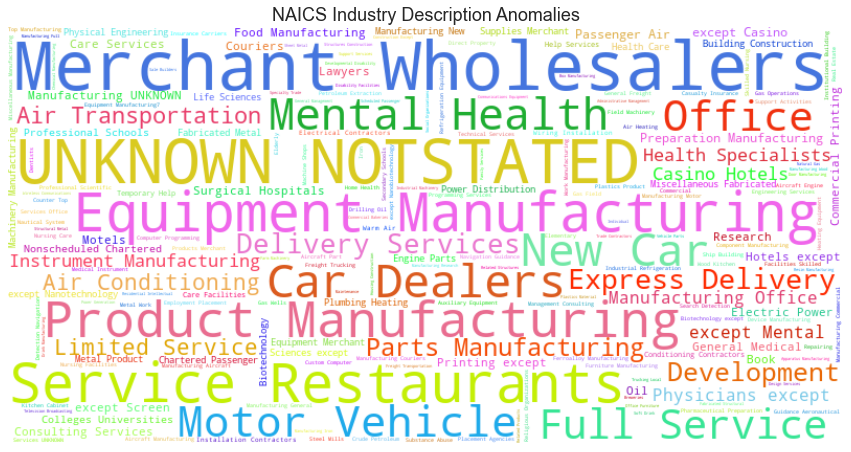

In [366]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

anomaly_text = " ".join(description for description in ppp_anomaly_df['NAICS Industry Description'])

# Define a function to change the color of the words to random colors
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    h = np.random.randint(0, 360)  # Hue
    s = np.random.randint(70, 100) # Saturation
    l = np.random.randint(40, 70)  # Lightness
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generate a word cloud image with the new color function
wordcloud = WordCloud(
    background_color='white',
    # mask=mask,  # Uncomment if you're using a mask image
    max_words=200,
    max_font_size=100, 
    random_state=42,
    width=800, 
    height=400,
    stopwords=STOPWORDS
).generate(anomaly_text)

# Apply the random color function to the word cloud
wordcloud.recolor(color_func=random_color_func)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('NAICS Industry Description Anomalies', fontsize=18)
plt.show()

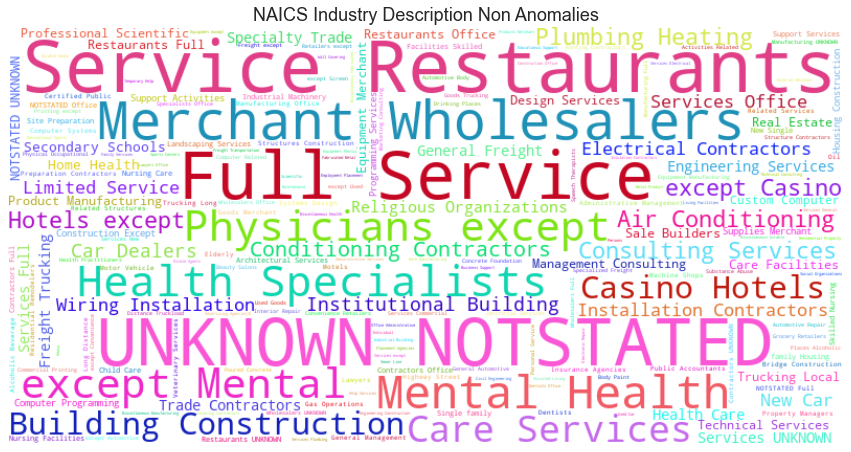

In [367]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

non_anomaly_text = " ".join(description for description in ppp_non_anomaly_df['NAICS Industry Description'])

# Define a function to change the color of the words to random colors
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    h = np.random.randint(0, 360)  # Hue
    s = np.random.randint(70, 100) # Saturation
    l = np.random.randint(40, 70)  # Lightness
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generate a word cloud image with the new color function
wordcloud = WordCloud(
    background_color='white',
    # mask=mask,  # Uncomment if you're using a mask image
    max_words=200,
    max_font_size=100, 
    random_state=42,
    width=800, 
    height=400,
    stopwords=STOPWORDS
).generate(non_anomaly_text)

# Apply the random color function to the word cloud
wordcloud.recolor(color_func=random_color_func)

# Display the generated image using matplotlib
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('NAICS Industry Description Non Anomalies', fontsize=18)
plt.show()

### Scatterplots for per_employee fields 

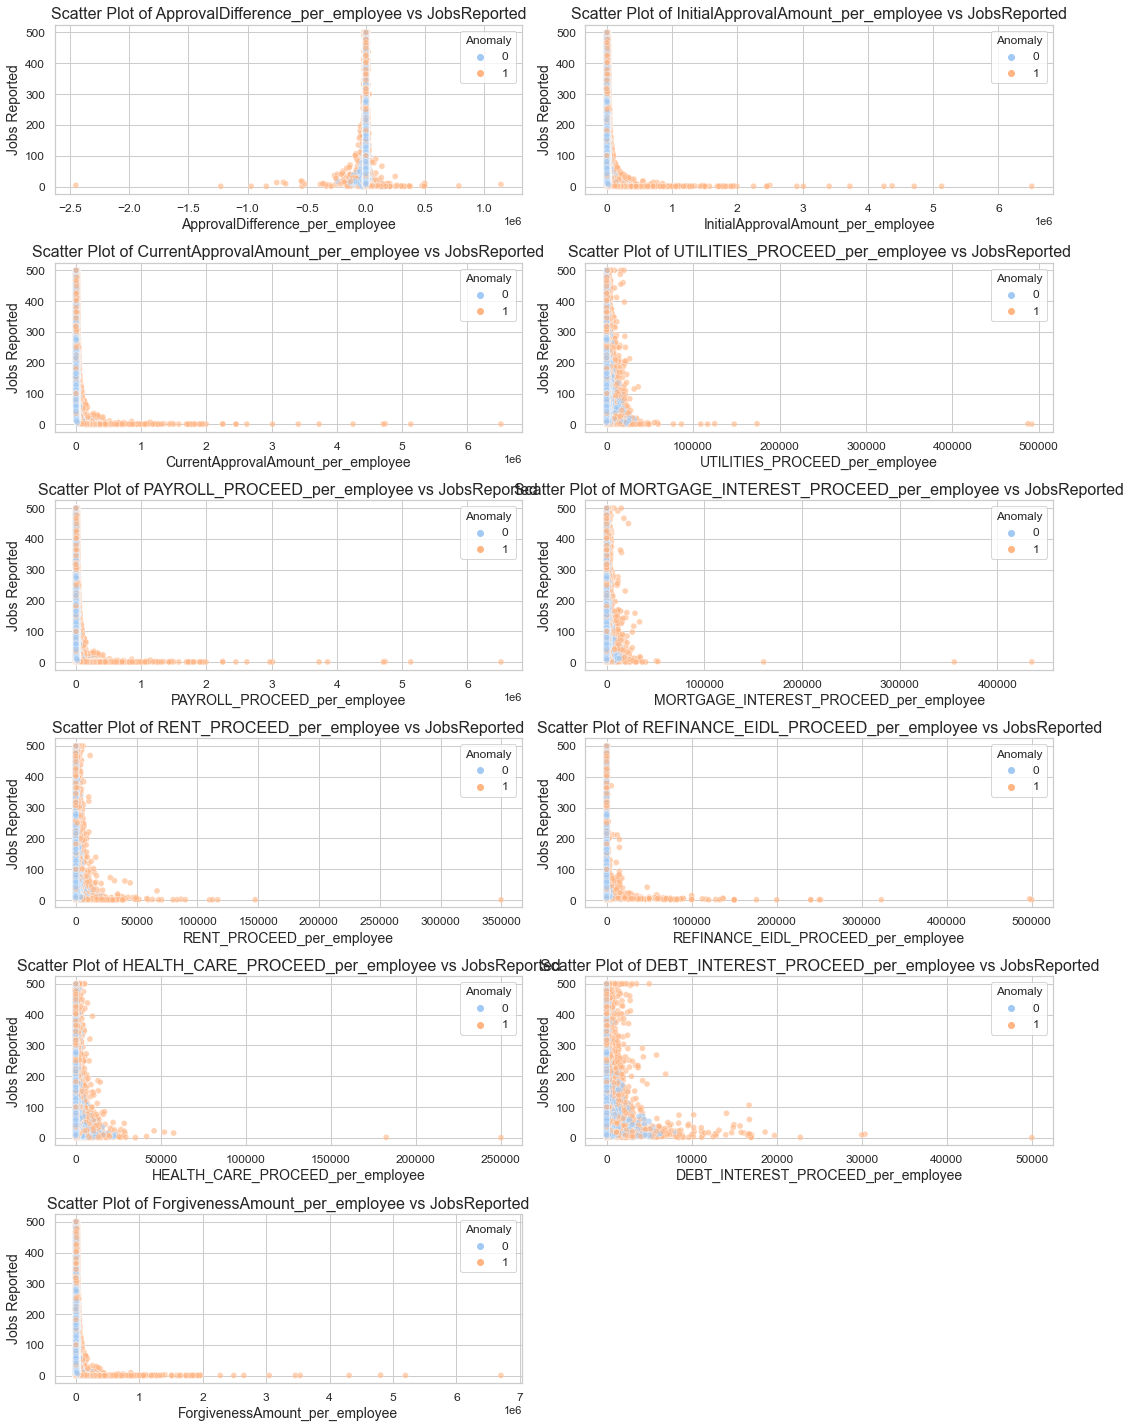

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette='pastel')  

rows = 6  
cols = 2  
fig, axs = plt.subplots(rows, cols, figsize=(15, 20)) 
axs = axs.flatten()  

per_emp_features = ['ApprovalDifference_per_employee','InitialApprovalAmount_per_employee',
                    'CurrentApprovalAmount_per_employee','UTILITIES_PROCEED_per_employee',
                    'PAYROLL_PROCEED_per_employee', 'MORTGAGE_INTEREST_PROCEED_per_employee',
                    'RENT_PROCEED_per_employee', 'REFINANCE_EIDL_PROCEED_per_employee',
                    'HEALTH_CARE_PROCEED_per_employee','DEBT_INTEREST_PROCEED_per_employee',
                    'ForgivenessAmount_per_employee']

for i, feature in enumerate(per_emp_features):
    sns.scatterplot(
        x=feature, 
        y='JobsReported', 
        hue='anomaly', 
        data=ppp_model_df, 
        ax=axs[i], 
        alpha=0.6  
    )
    axs[i].set_title(f'Scatter Plot of {feature} vs JobsReported', fontsize=16)  
    axs[i].set_xlabel(feature, fontsize=14)  
    axs[i].set_ylabel('Jobs Reported', fontsize=14)  
    axs[i].tick_params(labelsize=12) 
    axs[i].legend(title='Anomaly', loc='upper right', fontsize=12)  

total_plots = rows * cols
for i in range(len(per_emp_features), total_plots):
    fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()

In each graph, we see blue points clustered close to the starting point, which tells us that low proceeds per employee are the norm for most of the entities reported. The few data points that stand out from the cluster are marked as anomalies and indicate much higher proceeds per employee than usual. These could be genuine cases of high proceeds or could indicate errors in data reporting, fraud, or other special circumstances that need further investigation.

As we look further out from the start, the data points become fewer and more spread out. This right-skewed distribution, where a small number of entities report high proceeds per employee, while the majority have much lower amounts. The fact that there are fewer entities with high proceeds suggests that such high values are less common.

In [369]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    # using 3 for extreme outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers_df = df[(df[feature] > upper_bound)]
    return outliers_df

outliers = detect_outliers(ppp_model_df, 'CurrentApprovalAmount_per_employee')
extreme_outliers = outliers
extreme_outliers.head(10)

LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
19   6735557309   2020-04-30           1084              PPP   
42   4605797009   2020-04-04           1084              PPP   
43   4042717100   2020-04-12           1084              PPP   
51   3573847109   2020-04-11           1084              PPP   
52   4189357104   2020-04-13           1084              PPP   
111  7569397002   2020-04-07           1084              PPP   
151  1761588707   2021-03-27           1084              PPS   
179  5835917008   2020-04-06           1084              PPP   
187  8704858602   2021-03-25           1084              PPS   
203  6018737007   2020-04-06           1084              PPP   

                                BorrowerName              BorrowerAddress  \
19           TYONEK WORLDWIDE SERVICES, INC.                    1689 C ST   
42                   FULLFORD ELECTRIC, INC.            303 E VAN HORN RD   
43            PRUHS CONSTRUCTION CO., L.L.C.               2193 VIKING DR   
51                     GREAT NORTHWEST, INC.           2975 VAN HORN ROAD   
52                 NEESER CONSTRUCTION, INC.          2501 BLUEBERRY ROAD   
111              MCKENNA BROTHERS PAVING INC       6129 PETERSBURG STREET   
151  ADVANCED SUPPLY CHAIN INTERNATIONAL LLC      2525 GAMBELL ST STE 405   
179                     WOLVERINE SUPPLY INC        5099 E BLUE LUPINE DR   
187                 BRECHAN CONSTRUCTION LLC             2705 MILL BAY RD   
203      ALASKA INDEPENDENT COACH TOURS, LLC  3900 ARCTIC BLVD. SUITE 301   

    BorrowerCity BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
19     ANCHORAGE            AK       99501     2021-07-22   EXEMPTION 4    60   
42     FAIRBANKS            AK       99701     2021-07-20  PAID IN FULL    24   
43     ANCHORAGE            AK       99501     2021-08-20  PAID IN FULL    24   
51     FAIRBANKS            AK       99709     2021-12-18  PAID IN FULL    24   
52     ANCHORAGE            AK       99503     2021-09-08  PAID IN FULL    24   
111    ANCHORAGE            AK       99507     2021-06-05  PAID IN FULL    24   
151    ANCHORAGE            AK       99503     2021-07-22   EXEMPTION 4    60   
179      WASILLA            AK       99654     2021-07-20  PAID IN FULL    24   
187       KODIAK            AK       99615     2021-12-04  PAID IN FULL    60   
203    ANCHORAGE            AK       99503     2023-02-02  PAID IN FULL    60   

     SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
19                     100             6412487.00             6412487.00   
42                     100             2599900.00             3425709.00   
43                     100             1625000.00             3403381.00   
51                     100             3079300.00             3079300.00   
52                     100             3071121.00             3071121.00   
111                    100             1914800.00             1914800.00   
151                    100             1600000.00             1600000.00   
179                    100             1396885.00             1396885.00   
187                    100             1360845.00             1360845.00   
203                    100              604600.00             1297700.00   

     UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
19                0.00  UNKNOWN/NOTSTATED                      44449   
42                0.00  UNKNOWN/NOTSTATED                     116975   
43                0.00  UNKNOWN/NOTSTATED                      56102   
51                0.00  UNKNOWN/NOTSTATED                      56102   
52                0.00  UNKNOWN/NOTSTATED                       3386   
111               0.00  UNKNOWN/NOTSTATED                      90739   
151               0.00  UNKNOWN/NOTSTATED                     116975   
179               0.00  UNKNOWN/NOTSTATED                     116975   
187               0.00  UNKNOWN/NOTSTATED                       3386   
203

Entries show an unusually high 'CurrentApprovalAmount_per_employee', especially compared to the number of 'JobsReported'. these entries have been flagged as anomalies by IF, due to the discrepancy in loan amounts compared to other data points. 

Most entries also have a negative 'non_forgiven_loan_portion', this suggests that the 'ForgivenessAmount' granted is higher than the 'CurrentApprovalAmount', which is peculiar and goes against the typical structure of loan programs. Under programs like the PPP, the amount forgiven is supposed to be up to the full principal amount of the loan and any interests, provided the funds were used according to the program's guidelines. Therefore, the forgiveness amount should not exceed the original approved amount.

### Processing Method

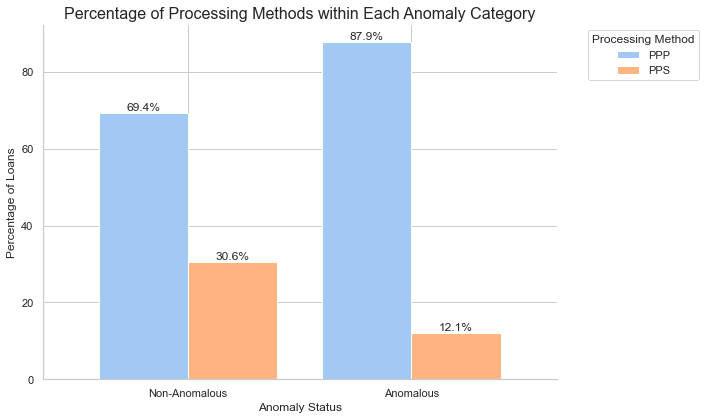

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") 

# Create a pivot table to calculate the percentage of each ProcessingMethod within each anomaly category
pm_pivot_table = ppp_model_df.pivot_table(index='anomaly', columns='ProcessingMethod', aggfunc='size', fill_value=0)

# Normalize the counts to get percentages
pivot_percentages = pm_pivot_table.div(pm_pivot_table.sum(axis=1), axis=0) * 100


colors = sns.color_palette('pastel')  
ax = pivot_percentages.plot(kind='bar', stacked=False, width=0.8, color=colors, figsize=(10, 6))

plt.title('Percentage of Processing Methods within Each Anomaly Category', fontsize=16)
plt.xlabel('Anomaly Status', fontsize=12)
plt.ylabel('Percentage of Loans', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Anomalous', 'Anomalous'], rotation=0)
plt.legend(title='Processing Method', bbox_to_anchor=(1.05, 1), loc='upper left')  
sns.despine()  

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center', va='bottom')

plt.tight_layout() 
plt.show()


In [371]:
pm_pivot_table

ProcessingMethod     PPP     PPS
anomaly                         
0                 652494  287958
1                  22054    3042

PPP method has a much larger bar in the Anomalous category, indicating a significantly higher percentage of loans processed as anomalies.

### Business Type

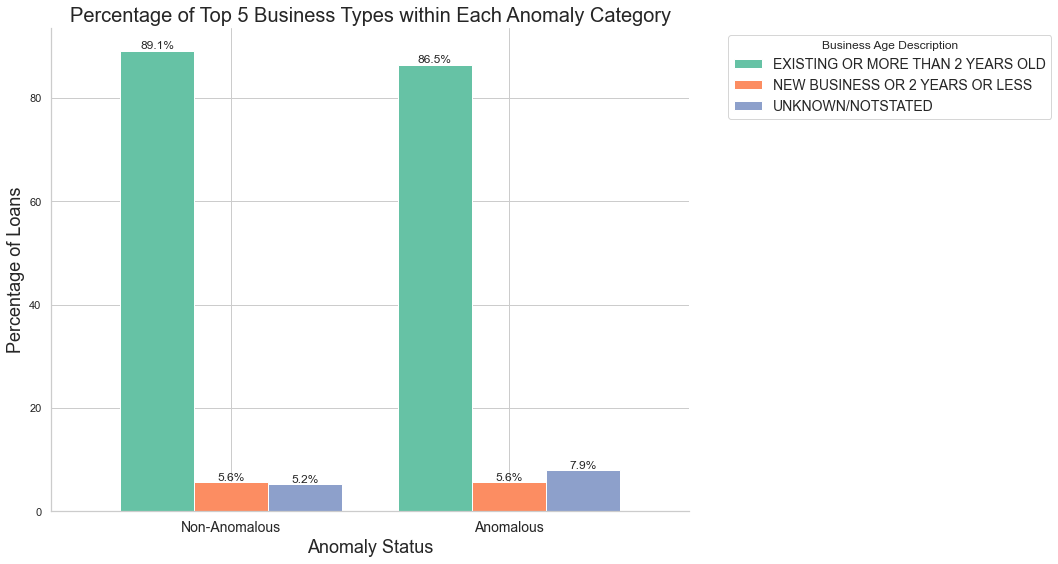

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set the style for the plots

# Create a pivot table
bt_pivot_table = ppp_model_df.pivot_table(index='anomaly', columns='BusinessAgeDescription', aggfunc='size', fill_value=0)

# Select the top 5 most common BusinessAgeDescriptions across all anomalies
top_methods = bt_pivot_table.sum(axis=0).nlargest(3).index
pivot_table_top_methods = bt_pivot_table[top_methods]

# Normalize the counts to get percentages for the top 5 Business Age Descriptions
pivot_percentages_top_methods = pivot_table_top_methods.div(pivot_table_top_methods.sum(axis=1), axis=0) * 100

# Define a color palette that's distinct and visually appealing
colors = sns.color_palette('Set2')

# Plot with increased width in figsize
ax = pivot_percentages_top_methods.plot(kind='bar', stacked=False, width=0.8, color=colors, figsize=(15, 8))  # Increased figure size

# Customize the plot with a title, and labels for x and y axes
plt.title('Percentage of Top 5 Business Types within Each Anomaly Category', fontsize=20)  # Increased font size for the title
plt.xlabel('Anomaly Status', fontsize=18)  # Increased font size for x-axis label
plt.ylabel('Percentage of Loans', fontsize=18)  # Increased font size for y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Anomalous', 'Anomalous'], rotation=0, fontsize=14)  # Increased font size for x-axis ticks
plt.legend(title='Business Age Description', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)  # Adjusted font size for legend

sns.despine()  # Remove the top and right spines from the plot

# Add value labels on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center', va='bottom', fontsize=12)  # Increased font size for annotations

plt.tight_layout()  # Adjust layout to fit everything nicely

# Display the plot
plt.show()

In [373]:
bt_pivot_table.sort_values(by=0, axis=1, ascending=False)

BusinessAgeDescription  EXISTING OR MORE THAN 2 YEARS OLD  \
anomaly                                                     
0                                                  837783   
1                                                   21537   

BusinessAgeDescription  NEW BUSINESS OR 2 YEARS OR LESS  UNKNOWN/NOTSTATED  \
anomaly                                                                      
0                                                 53083              49075   
1                                                  1396               1977   

BusinessAgeDescription  STARTUP, LOAN FUNDS WILL OPEN BUSINESS  \
anomaly                                                          
0                                                          257   
1                                                           18   

BusinessAgeDescription  CHANGE OF OWNERSHIP  
anomaly                                      
0                                       254  
1                                       168

In [374]:
bt_pivot_table.sort_values(by=1, axis=1, ascending=False)

BusinessAgeDescription  EXISTING OR MORE THAN 2 YEARS OLD  UNKNOWN/NOTSTATED  \
anomaly                                                                        
0                                                  837783              49075   
1                                                   21537               1977   

BusinessAgeDescription  NEW BUSINESS OR 2 YEARS OR LESS  CHANGE OF OWNERSHIP  \
anomaly                                                                        
0                                                 53083                  254   
1                                                  1396                  168   

BusinessAgeDescription  STARTUP, LOAN FUNDS WILL OPEN BUSINESS  
anomaly                                                         
0                                                          257  
1                                                           18

Excluding "Existing for more then 2 years old" type, for the anomalous group, loans that have not provided the business types seems to have a higher percentage. 

### Employee group

In [375]:
bins = [0, 5, 10, 20, 50, 100, 250, 501]
labels = ['<5 Employees', '5-9 Employees', '10-19 Employees', '20-49 Employees', 
          '50-99 Employees', '100-249 Employees', '250-500 Employees']

# Create the 'EmployeeGroup' field
ppp_model_df['EmployeeGroup'] = pd.cut(ppp_model_df['JobsReported'], bins=bins, labels=labels, right=False)

# Display the DataFrame to verify the results
print(ppp_model_df[['JobsReported', 'EmployeeGroup']])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [376]:
ppp_model_df.head()

LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704   2020-05-01            464              PPP   
1  9777677704   2020-05-01            464              PPP   
2  5791407702   2020-05-01           1013              PPP   
3  6223567700   2020-05-01            920              PPP   
4  9662437702   2020-05-01            101              PPP   

               BorrowerName        BorrowerAddress       BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 HIGHWAY 15 SOUTH             SUMTER   
1     PLEASANT PLACES, INC.    7684 SOUTHRAIL ROAD   NORTH CHARLESTON   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E            SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD     SAN BERNARDINO   
4              AERO BOX LLC      UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

       BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0  UNKNOWN/NOTSTATED       29150     2020-12-18  PAID IN FULL    24   
1  UNKNOWN/NOTSTATED       29420     2021-09-28  PAID IN FULL    24   
2  UNKNOWN/NOTSTATED       98112     2021-03-17  PAID IN FULL    24   
3  UNKNOWN/NOTSTATED       92407     2021-10-16  PAID IN FULL    24   
4  UNKNOWN/NOTSTATED       UNKNO     2021-08-17  PAID IN FULL    24   

   SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
0                    100              769358.78              769358.78   
1                    100              736927.79              736927.79   
2                    100              691355.00              691355.00   
3                    100              499871.00              499871.00   
4                    100              367437.00              367437.00   

   UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
0               0.00  UNKNOWN/NOTSTATED                      19248   
1               0.00  UNKNOWN/NOTSTATED                      19248   
2               0.00  UNKNOWN/NOTSTATED                       9551   
3               0.00  UNKNOWN/NOTSTATED                       9551   
4               0.00  UNKNOWN/NOTSTATED                      57328   

                     ServicingLenderName   ServicingLenderAddress  \
0                           SYNOVUS BANK            1148 BROADWAY   
1                           SYNOVUS BANK            1148 BROADWAY   
2  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
3  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
4           THE HUNTINGTON NATIONAL BANK            17 S HIGH ST.   

  ServicingLenderCity ServicingLenderState  ServicingLenderZip  \
0            COLUMBUS                   GA               31901   
1            COLUMBUS                   GA               31901   
2           CHARLOTTE                   NC               28202   
3           CHARLOTTE                   NC               28202   
4            COLUMBUS                   OH               43215   

  RuralUrbanIndicator HubzoneIndicator LMIIndicator  \
0                   U                N            N   
1                   U                Y            Y   
2                   U                N            N   
3                   U                N            N   
4                   U                N            N   

              BusinessAgeDescription        ProjectCity  ProjectCountyName  \
0  EXISTING OR MORE THAN 2 YEARS OLD             SUMTER             SUMTER   
1  EXISTING OR MORE THAN 2 YEARS OLD   NORTH CHARLESTON         CHARLESTON   
2    NEW BUSINESS OR 2 YEARS OR LESS            SEATTLE               KING   
3    NEW BUSINESS OR 2 YEARS OR LESS     SAN BERNARDINO     SAN BERNARDINO   
4                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

        ProjectState ProjectZip                 CD  JobsReported  NAICSCode  \
0                 SC      29150              SC-05            62  325510.00   
1                 SC      29420              SC-06            73  561730.00   
2                 WA      98112              WA-0

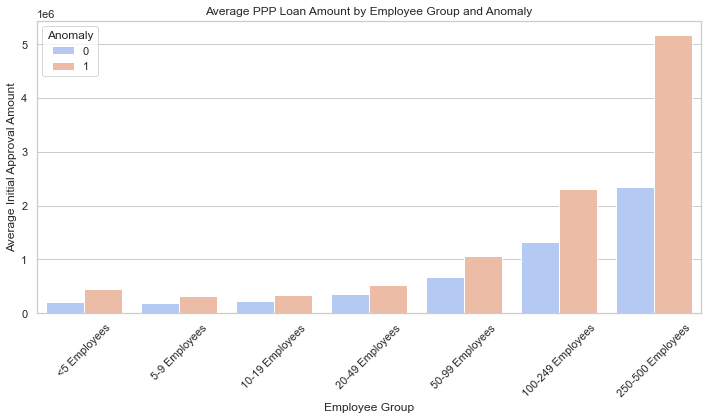

In [377]:
# Group by 'EmployeeGroup' and 'anomaly', then calculate the average PPP loan amount
average_loan_amount = ppp_model_df.groupby(['EmployeeGroup', 'anomaly'])['InitialApprovalAmount'].mean().reset_index()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='EmployeeGroup',
    y='InitialApprovalAmount',
    hue='anomaly',
    data=average_loan_amount,
    palette='coolwarm'
)

plt.title('Average PPP Loan Amount by Employee Group and Anomaly')
plt.xlabel('Employee Group')
plt.ylabel('Average Initial Approval Amount')
plt.xticks(rotation=45)  
plt.legend(title='Anomaly')
plt.tight_layout() 
plt.show()


There are noticeable anomalies in the '250-500 Employees' group, where the average loan amount for anomalous cases (Anomaly 1) is significantly higher than for non-anomalous cases (Anomaly 0). This could suggest that within this employee size range, there are outliers that could be potential cases of fraud

### Forgiveness Amounts

In [378]:
import pandas as pd

# calculate the count of zero forgiveness by anomaly status 
forgiveness_stats = ppp_model_df.groupby('anomaly')['ForgivenessAmount'].apply(lambda x: (x == 0).sum()).reset_index(name='count_of_zero_forgiveness')

# calculate the total count of anomalies and non-anomalies
total_counts = ppp_model_df['anomaly'].value_counts().reset_index()
total_counts.columns = ['anomaly', 'total_count']

# Merge the total counts into the forgiveness_stats dataframe
forgiveness_stats = forgiveness_stats.merge(total_counts, on='anomaly')

# Calculate the percentage of loans with zero or less forgiveness amount for each anomaly status
forgiveness_stats['percentage'] = (forgiveness_stats['count_of_zero_forgiveness'] / forgiveness_stats['total_count']) * 100

forgiveness_stats

anomaly  count_of_zero_forgiveness  total_count  percentage
0        0                      23604       940452        2.51
1        1                       2911        25096       11.60

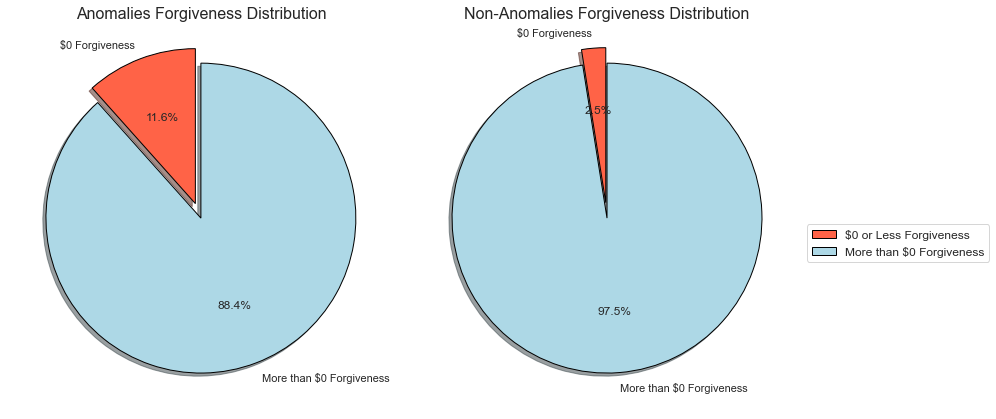

In [379]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
colors_set = ['tomato', 'lightblue']
explode_set = (0.1, 0)  

# Pie chart for anomalies 
anomaly_data = forgiveness_stats[forgiveness_stats['anomaly'] == True]
non_anomaly_data = forgiveness_stats[forgiveness_stats['anomaly'] == False]

# Plotting pie chart for anomaly loan
anomaly_pie = axs[0].pie(
    [anomaly_data['count_of_zero_forgiveness'].values[0],
     anomaly_data['total_count'].values[0] - anomaly_data['count_of_zero_forgiveness'].values[0]],
    labels=['$0 Forgiveness', 'More than $0 Forgiveness'],
    autopct='%1.1f%%', startangle=90, colors=colors_set, explode=explode_set,
    shadow=True, wedgeprops={'edgecolor': 'black'})

axs[0].set_title('Anomalies Forgiveness Distribution', fontdict={'fontsize': 16})

# Plotting pie chart for non-anomaly loans 
non_anomaly_pie = axs[1].pie(
    [non_anomaly_data['count_of_zero_forgiveness'].values[0],
     non_anomaly_data['total_count'].values[0] - non_anomaly_data['count_of_zero_forgiveness'].values[0]],
    labels=['$0 Forgiveness', 'More than $0 Forgiveness'],
    autopct='%1.1f%%', startangle=90, colors=colors_set, explode=explode_set,
    shadow=True, wedgeprops={'edgecolor': 'black'})

axs[1].set_title('Non-Anomalies Forgiveness Distribution', fontdict={'fontsize': 16})


plt.legend(
    labels=['$0 or Less Forgiveness', 'More than $0 Forgiveness'],
    loc='upper left',
    bbox_to_anchor=(1, 0.5),
    fontsize=12)
plt.tight_layout()
plt.show()

In a prior SBA OIG report, noted that borrowers who fraudulently obtained PPP loans are unlikely to apply for loan forgiveness because they had already obtained the funds and had no intention of repaying or using loan proceeds appropriately.

### REFINANCE_EIDL_PROCEED_per_employee

In [380]:
import pandas as pd

# Calculate the count of REFINANCE_EIDL_PROCEED_per_employee greater than 1000 by anomaly status
EIDL_stats = ppp_model_df.groupby('anomaly')['REFINANCE_EIDL_PROCEED_per_employee'].apply(lambda x: (x > 1000).sum()).reset_index(name='count_greater_than_1000')

# Calculate the total count of anomalies and non-anomalies
total_counts = ppp_model_df['anomaly'].value_counts().reset_index()
total_counts.columns = ['anomaly', 'total_count']

# Merge the total counts into the EIDL_stats dataframe
EIDL_stats = EIDL_stats.merge(total_counts, on='anomaly')

# Calculate the percentage of loans with REFINANCE_EIDL_PROCEED_per_employee greater than 1000 for each anomaly status
EIDL_stats['percentage_greater_than_1000'] = (EIDL_stats['count_greater_than_1000'] / EIDL_stats['total_count']) * 100

# Now EIDL_stats should have appropriate column names
EIDL_stats

anomaly  count_greater_than_1000  total_count  percentage_greater_than_1000
0        0                      170       940452                          0.02
1        1                      461        25096                          1.84

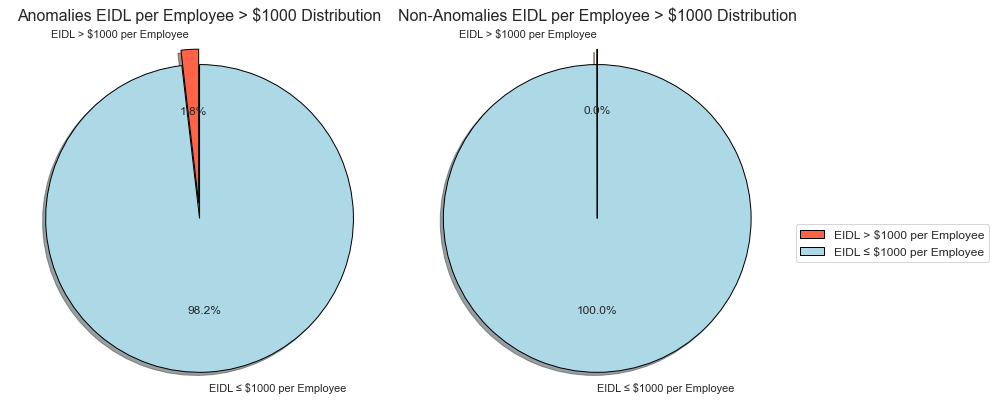

In [381]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
colors_set = ['tomato', 'lightblue']
explode_set = (0.1, 0)  

# Pie chart for anomalies 
anomaly_data = EIDL_stats[EIDL_stats['anomaly'] == True]
non_anomaly_data = EIDL_stats[EIDL_stats['anomaly'] == False]

# Plotting pie chart for anomaly loans 
anomaly_pie = axs[0].pie(
    [anomaly_data['count_greater_than_1000'].values[0],
     anomaly_data['total_count'].values[0] - anomaly_data['count_greater_than_1000'].values[0]],
    labels=['EIDL > $1000 per Employee', 'EIDL ≤ $1000 per Employee'],
    autopct='%1.1f%%', startangle=90, colors=colors_set, explode=explode_set,
    shadow=True, wedgeprops={'edgecolor': 'black'})

axs[0].set_title('Anomalies EIDL per Employee > $1000 Distribution', fontdict={'fontsize': 16})

# Plotting pie chart for non-anomaly loans 
non_anomaly_pie = axs[1].pie(
    [non_anomaly_data['count_greater_than_1000'].values[0],
     non_anomaly_data['total_count'].values[0] - non_anomaly_data['count_greater_than_1000'].values[0]],
    labels=['EIDL > $1000 per Employee', 'EIDL ≤ $1000 per Employee'],
    autopct='%1.1f%%', startangle=90, colors=colors_set, explode=explode_set,
    shadow=True, wedgeprops={'edgecolor': 'black'})

axs[1].set_title('Non-Anomalies EIDL per Employee > $1000 Distribution', fontdict={'fontsize': 16})

plt.legend(
    labels=['EIDL > $1000 per Employee', 'EIDL ≤ $1000 per Employee'],
    loc='upper left',
    bbox_to_anchor=(1, 0.5),
    fontsize=12)

plt.tight_layout()
plt.show()


In the early stages of the pandemic, applicants were limited by SBA to receiving 1,000 per employee up to a legislated maximum EIDL advance amount of $10,000. These EIDL advances were essentially grants that did not need to be repaid

### High Loan Amount Relative to Industry Standards

In [386]:
#ppp_model_df.drop(columns=['mean', 'std','industry_mean','industry_std','HighLoanFlag'], inplace=True)

In [387]:
import pandas as pd

# Calculate the industry averages and standard deviation
industry_averages = ppp_model_df.groupby('NAICS Industry Description')['InitialApprovalAmount'].agg(['mean', 'std']).reset_index()

# Rename the columns to prevent a conflict and make them identifiable
industry_averages.rename(columns={'mean': 'industry_mean', 'std': 'industry_std'}, inplace=True)

# Merge the industry averages back onto the original dataframe
ppp_model_df = ppp_model_df.merge(industry_averages, on='NAICS Industry Description', how='left')

# Define a high loan flag column based on a threshold, mean + 3*std
ppp_model_df['HighLoanFlag'] = ppp_model_df.apply(
    lambda x: x['CurrentApprovalAmount'] > (x['industry_mean'] + 3 * x['industry_std'])
    if pd.notnull(x['industry_std']) and x['industry_std'] > 0 else False,
    axis=1
)

checks if the 'CurrentApprovalAmount' for each loan is greater than the industry mean plus three times the industry standard deviation (a common threshold for defining outliers).

In [388]:
ppp_model_df.head()

LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
0  9547507704   2020-05-01            464              PPP   
1  9777677704   2020-05-01            464              PPP   
2  5791407702   2020-05-01           1013              PPP   
3  6223567700   2020-05-01            920              PPP   
4  9662437702   2020-05-01            101              PPP   

               BorrowerName        BorrowerAddress       BorrowerCity  \
0     SUMTER COATINGS, INC.  2410 HIGHWAY 15 SOUTH             SUMTER   
1     PLEASANT PLACES, INC.    7684 SOUTHRAIL ROAD   NORTH CHARLESTON   
2   BOYER CHILDREN'S CLINIC       1850 BOYER AVE E            SEATTLE   
3  KIRTLEY CONSTRUCTION INC   1661 MARTIN RANCH RD     SAN BERNARDINO   
4              AERO BOX LLC      UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

       BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0  UNKNOWN/NOTSTATED       29150     2020-12-18  PAID IN FULL    24   
1  UNKNOWN/NOTSTATED       29420     2021-09-28  PAID IN FULL    24   
2  UNKNOWN/NOTSTATED       98112     2021-03-17  PAID IN FULL    24   
3  UNKNOWN/NOTSTATED       92407     2021-10-16  PAID IN FULL    24   
4  UNKNOWN/NOTSTATED       UNKNO     2021-08-17  PAID IN FULL    24   

   SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
0                    100              769358.78              769358.78   
1                    100              736927.79              736927.79   
2                    100              691355.00              691355.00   
3                    100              499871.00              499871.00   
4                    100              367437.00              367437.00   

   UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
0               0.00  UNKNOWN/NOTSTATED                      19248   
1               0.00  UNKNOWN/NOTSTATED                      19248   
2               0.00  UNKNOWN/NOTSTATED                       9551   
3               0.00  UNKNOWN/NOTSTATED                       9551   
4               0.00  UNKNOWN/NOTSTATED                      57328   

                     ServicingLenderName   ServicingLenderAddress  \
0                           SYNOVUS BANK            1148 BROADWAY   
1                           SYNOVUS BANK            1148 BROADWAY   
2  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
3  BANK OF AMERICA, NATIONAL ASSOCIATION  100 N TRYON ST, STE 170   
4           THE HUNTINGTON NATIONAL BANK            17 S HIGH ST.   

  ServicingLenderCity ServicingLenderState  ServicingLenderZip  \
0            COLUMBUS                   GA               31901   
1            COLUMBUS                   GA               31901   
2           CHARLOTTE                   NC               28202   
3           CHARLOTTE                   NC               28202   
4            COLUMBUS                   OH               43215   

  RuralUrbanIndicator HubzoneIndicator LMIIndicator  \
0                   U                N            N   
1                   U                Y            Y   
2                   U                N            N   
3                   U                N            N   
4                   U                N            N   

              BusinessAgeDescription        ProjectCity  ProjectCountyName  \
0  EXISTING OR MORE THAN 2 YEARS OLD             SUMTER             SUMTER   
1  EXISTING OR MORE THAN 2 YEARS OLD   NORTH CHARLESTON         CHARLESTON   
2    NEW BUSINESS OR 2 YEARS OR LESS            SEATTLE               KING   
3    NEW BUSINESS OR 2 YEARS OR LESS     SAN BERNARDINO     SAN BERNARDINO   
4                  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED  UNKNOWN/NOTSTATED   

        ProjectState ProjectZip                 CD  JobsReported  NAICSCode  \
0                 SC      29150              SC-05            62  325510.00   
1                 SC      29420              SC-06            73  561730.00   
2                 WA      98112              WA-0

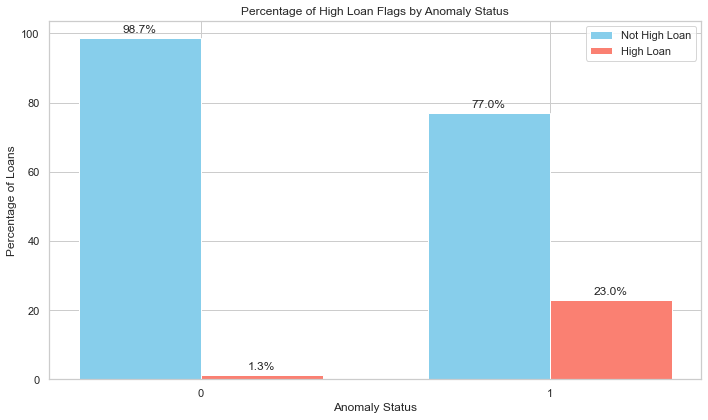

In [389]:
# Calculate the count of loans for each combination of anomaly and HighLoanFlag
loan_counts = ppp_model_df.groupby(['anomaly', 'HighLoanFlag']).size().reset_index(name='counts')

# Calculate the total number of loans for each anomaly status
total_loans_by_anomaly = loan_counts.groupby('anomaly')['counts'].transform('sum')

# Calculate the percentage of high loan flags within each anomaly group
loan_counts['percentage'] = (loan_counts['counts'] / total_loans_by_anomaly * 100).round(1)

# Pivot the data for plotting
loan_counts_pivot = loan_counts.pivot(index='anomaly', columns='HighLoanFlag', values='percentage').fillna(0)

# Prepare the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
anomaly_categories = loan_counts_pivot.index.values
bar_width = 0.35  # Set the width of each bar
index = np.arange(len(anomaly_categories))

bar1 = plt.bar(index, loan_counts_pivot[False], bar_width, label='Not High Loan', color='skyblue')
bar2 = plt.bar(index + bar_width, loan_counts_pivot[True], bar_width, label='High Loan', color='salmon')

# Add annotations
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xlabel('Anomaly Status')
plt.ylabel('Percentage of Loans')
plt.title('Percentage of High Loan Flags by Anomaly Status')
plt.xticks(index + bar_width / 2, anomaly_categories)  # Place the x-ticks in the center of the two bars
plt.legend()

plt.tight_layout()
plt.show()

This chart suggests that anomalous loans have a higher tendency to be flagged as high compared to non-anomalous loans.

In [390]:
# Create a pivot table
hl_pivot_table = ppp_model_df.pivot_table(
    index=['NAICS Industry Description', 'anomaly'],
    columns='HighLoanFlag',
    aggfunc='size',
    fill_value=0
)
hl_pivot_table['Total'] = hl_pivot_table.sum(axis=1)
hl_pivot_table['HighLoanPercentage'] = ((hl_pivot_table[True] / hl_pivot_table['Total']) * 100).round(2)
hl_pivot_table

HighLoanFlag                                                False  True  \
NAICS Industry Description                         anomaly                
Abrasive Product Manufacturing                     0          116     1   
                                                   1           13     4   
Adhesive Manufacturing                             0          158     3   
                                                   1            9     3   
Administrative Management and General Managemen... 0         5999    86   
                                                   1           78    37   
Advertising Agencies10                             0         3176    39   
                                                   1           22    17   
Advertising Material Distribution Services         0          255     5   
                                                   1            2     1   
Agents and Managers for Artists, Athletes, Ente... 0          480     3   
                                                   1           10     3   
Air Traffic Control                                0           15     0   
Air and Gas Compressor Manufacturing               0          126     2   
                                                   1           24     3   
Aircraft Engine and Engine Parts Manufacturing     0          182     0   
                                                   1          168     5   
Aircraft Manufacturing                             0          103     0   
                                                   1          129     5   
Air‑Conditioning and Warm Air Heating Equipment... 0          476     3   
                                                   1          116    15   
All Other Amusement and Recreation Industries      0         1797    34   
                                                   1           38     7   
All Other Animal Production                        0          175     3   
                                                   1            2     1   
All Other Automotive Repair and Maintenance        0          670     9   
                                                   1            5     0   
All Other Basic Organic Chemical Manufacturing     0          185     0   
                                                   1           41     5   
All Other Business Support Services                0         2816    48   
                                                   1           25    11   
All Other Consumer Goods Rental                    0          470     2   
                                                   1            3     5   
All Other Converted Paper Product Manufacturing    0          233     0   
                                                   1            8     3   
All Other Grain Farming                            0          163     4   
                                                   1            3     0   
All Other Insurance Related Activities             0          561    10   
                                                   1            4     1   
All Other Legal Services                           0          839    12   
                                                   1           17     8   
All Other Miscellaneous Ambulatory Health Care ... 0         2042    24   
                                                   1           15    15   
All Other Miscellaneous Chemical Product and Pr... 0          553     8   
                                                   1           40     7   
All Other Miscellaneous Crop Farming               0         1068    13   
                                                   1           20     6   
All Other Miscellaneous Electrical Equipment an... 0          665    10   
                                                   1           56     7   
All Other Miscellaneous Fabricated Metal Produc... 0         2615    22   
                                                   1          177    35   
All Other Miscellaneous F

In [391]:
# calculate the total high loans and total loans for each NAICS Industry Description
industry_totals = ppp_model_df.groupby('NAICS Industry Description')['HighLoanFlag'].agg(['sum', 'count']).rename(columns={'sum': 'HighLoanCount', 'count': 'LoanCount'})

# Calculate the overall high loan percentage for each industry
industry_totals['OverallHighLoanPercentage'] = (industry_totals['HighLoanCount'] / industry_totals['LoanCount'] * 100).round(2)
industry_totals

# Map the overall high loan percentage back to the original pivot table for each NAICS Industry Description
hl_pivot_table['OverallHighLoanPercentage'] = hl_pivot_table.index.get_level_values('NAICS Industry Description').map(industry_totals['OverallHighLoanPercentage'])

# Filter for the 'Anomalous' category and get the top 10 industries by high loan percentage
top_10_anomalous_industries = hl_pivot_table.xs(1, level='anomaly').nlargest(10, 'OverallHighLoanPercentage')
top_10_anomalous_industries

HighLoanFlag                                        False  True  Total  \
NAICS Industry Description                                               
Nonferrous Forging                                      5     2      7   
Cotton Farming                                          1     2      3   
Crushed and Broken Granite Mining and Quarrying         1     0      1   
Poultry Hatcheries                                      1     0      1   
Surface Active Agent Manufacturing                      2     1      3   
Pipeline Transportation of Refined Petroleum Pr...     18     2     20   
Metal Can Manufacturing                                 8     1      9   
Fabric Coating Mills                                    3     2      5   
Noncurrent‑Carrying Wiring Device Manufacturing         4     1      5   
Poultry Processing                                     35     6     41   

HighLoanFlag                                        HighLoanPercentage  \
NAICS Industry Description                                               
Nonferrous Forging                                               28.57   
Cotton Farming                                                   66.67   
Crushed and Broken Granite Mining and Quarrying                   0.00   
Poultry Hatcheries                                                0.00   
Surface Active Agent Manufacturing                               33.33   
Pipeline Transportation of Refined Petroleum Pr...               10.00   
Metal Can Manufacturing                                          11.11   
Fabric Coating Mills                                             40.00   
Noncurrent‑Carrying Wiring Device Manufacturing                  20.00   
Poultry Processing                                               14.63   

HighLoanFlag                                        OverallHighLoanPercentage  
NAICS Industry Description                                                     
Nonferrous Forging                                                       7.41  
Cotton Farming                                                           6.82  
Crushed and Broken Granite Mining and Quarrying                          6.25  
Poultry Hatcheries                                                       5.88  
Surface Active Agent Manufacturing                                       5.88  
Pipeline Transportation of Refined Petroleum Pr...                       5.71  
Metal Can Manufacturing                                                  5.26  
Fabric Coating Mills                                                     5.17  
Noncurrent‑Carrying Wiring Device Manufacturing                          5.13  
Poultry Processing                                                       4.80

### Inflated Payroll Costs

In [392]:
# filter out any rows where PAYROLL_PROCEED_per_employee is zero to avoid division by zero errors.
df = ppp_model_df[ppp_model_df['PAYROLL_PROCEED_per_employee'] > 0]

typical_payroll_per_job = df['PAYROLL_PROCEED_per_employee'].median()

# A threshold for what we consider 'high' might be some multiple of the typical cost.
# For example, twice the median might be considered unusually high.
threshold_multiplier = 3
high_payroll_threshold = typical_payroll_per_job * threshold_multiplier

# flag loans with potentially inflated payroll costs.
df['InflatedPayrollFlag'] = df['PAYROLL_PROCEED_per_employee'] > high_payroll_threshold
inflated_payroll_loans = df[df['InflatedPayrollFlag']]

count_inflated_payroll = inflated_payroll_loans.shape[0]
print(f"There are {count_inflated_payroll} applications with potentially inflated payroll costs.")

inflated_payroll_loans.head()

There are 10852 applications with potentially inflated payroll costs.


LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
19  6735557309   2020-04-30           1084              PPP   
42  4605797009   2020-04-04           1084              PPP   
43  4042717100   2020-04-12           1084              PPP   
48  4966677003   2020-04-04           1084              PPP   
51  3573847109   2020-04-11           1084              PPP   

                       BorrowerName       BorrowerAddress BorrowerCity  \
19  TYONEK WORLDWIDE SERVICES, INC.             1689 C ST    ANCHORAGE   
42          FULLFORD ELECTRIC, INC.     303 E VAN HORN RD    FAIRBANKS   
43   PRUHS CONSTRUCTION CO., L.L.C.        2193 VIKING DR    ANCHORAGE   
48   ALCAN ELEC. & ENGINEERING INC.  6670 ARCTIC SPUR RD.    ANCHORAGE   
51            GREAT NORTHWEST, INC.    2975 VAN HORN ROAD    FAIRBANKS   

   BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
19            AK       99501     2021-07-22   EXEMPTION 4    60   
42            AK       99701     2021-07-20  PAID IN FULL    24   
43            AK       99501     2021-08-20  PAID IN FULL    24   
48            AK       99518     2021-07-21  PAID IN FULL    24   
51            AK       99709     2021-12-18  PAID IN FULL    24   

    SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
19                    100             6412487.00             6412487.00   
42                    100             2599900.00             3425709.00   
43                    100             1625000.00             3403381.00   
48                    100             3145700.00             3145700.00   
51                    100             3079300.00             3079300.00   

    UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
19               0.00  UNKNOWN/NOTSTATED                      44449   
42               0.00  UNKNOWN/NOTSTATED                     116975   
43               0.00  UNKNOWN/NOTSTATED                      56102   
48               0.00  UNKNOWN/NOTSTATED                     116975   
51               0.00  UNKNOWN/NOTSTATED                      56102   

               ServicingLenderName ServicingLenderAddress ServicingLenderCity  \
19  PNC BANK, NATIONAL ASSOCIATION       222 DELAWARE AVE          WILMINGTON   
42                   NORTHRIM BANK            3111 'C' ST           ANCHORAGE   
43    KEYBANK NATIONAL ASSOCIATION          127 PUBLIC SQ           CLEVELAND   
48                   NORTHRIM BANK            3111 'C' ST           ANCHORAGE   
51    KEYBANK NATIONAL ASSOCIATION          127 PUBLIC SQ           CLEVELAND   

   ServicingLenderState  ServicingLenderZip RuralUrbanIndicator  \
19                   DE               19801                   U   
42                   AK               99503                   R   
43                   OH               44114                   U   
48                   AK               99503                   U   
51                   OH               44114                   R   

   HubzoneIndicator LMIIndicator             BusinessAgeDescription  \
19                Y            Y  EXISTING OR MORE THAN 2 YEARS OLD   
42                Y            N  EXISTING OR MORE THAN 2 YEARS OLD   
43                Y            Y                  UNKNOWN/NOTSTATED   
48                N            N  EXISTING OR MORE THAN 2 YEARS OLD   
51                Y            N                  UNKNOWN/NOTSTATED   

   ProjectCity     ProjectCountyName ProjectState ProjectZip   CD  \
19   ANCHORAGE             ANCHORAGE           AK      99501  AK-   
42   FAIRBANKS  FAIRBANKS NORTH STAR           AK      99701  AK-   
43   ANCHORAGE             ANCHORAGE           AK      99501  AK-   
48   ANCHORAGE             ANCHORAGE           AK      99518  AK-   
51   FAIRBANKS  FAIRBANKS NORTH STAR           AK      99709  AK-   

    JobsReported  NAICSCode        Race          Ethnicity  UTILITIES_PROCEED  \
19            42  488190.00  UNANSWERED  UNKNOWN/NOTSTATED               0.00   
42   

In [393]:
# Display the counts
print(f"Number of anomalies: {inflated_payroll_loans['anomaly'].value_counts().get(1, 0)}")
print(f"Number of non-anomalies: {inflated_payroll_loans['anomaly'].value_counts().get(0, 0)}")

Number of anomalies: 1910
Number of non-anomalies: 8942


### Jobs Reported vs Size Standards

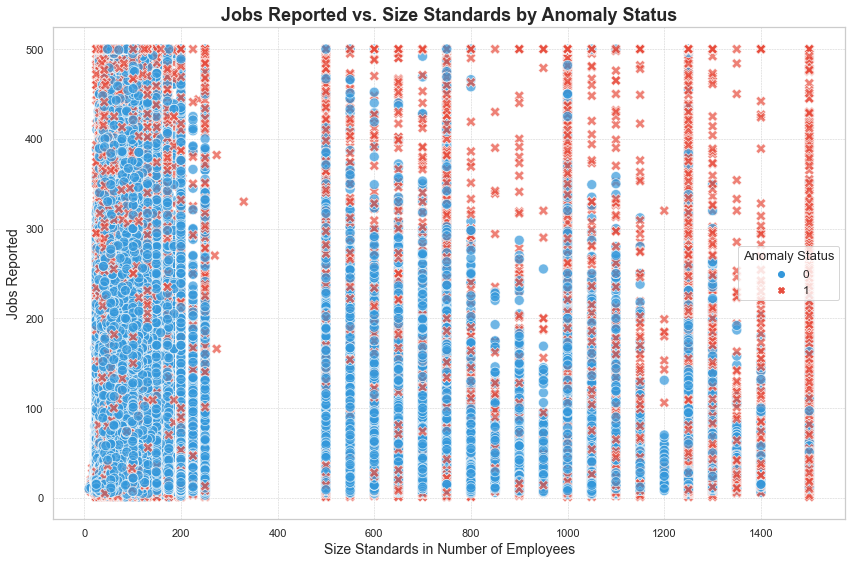

In [394]:
plt.figure(figsize=(12, 8)) 

sns.scatterplot(
    data=ppp_model_df,
    x='Size standards in number of employees',
    y='JobsReported',
    hue='anomaly', 
    style='anomaly',  
    s=100, 
    alpha=0.7,  
    palette=['#3498db', '#e74c3c'],  
)

plt.title('Jobs Reported vs. Size Standards by Anomaly Status', fontsize=18, fontweight='bold')
plt.xlabel('Size Standards in Number of Employees', fontsize=14)
plt.ylabel('Jobs Reported', fontsize=14)
plt.legend(title='Anomaly Status', title_fontsize='13', fontsize='12')
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.tight_layout()  

plt.show()  

anomalies have either unusually high or low in job numbers for their size standards

In [395]:
threshold = 5

# Calculate a flag for each loan where the JobsReported exceeds the size standard
df['ExcessJobsFlag'] = (ppp_model_df['JobsReported'] > (ppp_model_df['Size standards in number of employees'] * threshold))

# Count the number of loans where JobsReported is exceptionally high
excess_jobs_count = df['ExcessJobsFlag'].sum()

# Display the count
print(f"Number of loans with exceptionally high JobsReported: {excess_jobs_count}")

# Optionally, filter the DataFrame to view these specific loans
loans_with_excess_jobs = df[df['ExcessJobsFlag']]
loans_with_excess_jobs.head()

Number of loans with exceptionally high JobsReported: 15512


LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
13  5502308207   2020-08-08           1084              PPP   
14  6110847106   2020-04-14           1084              PPP   
16  5120868804   2021-04-17           1084              PPP   
18  6732787302   2020-04-30           1084              PPP   
21  1570017908   2020-06-10           1084              PPP   

                             BorrowerName          BorrowerAddress  \
13          KAKIVIK ASSET MANAGEMENT, LLC  5015 BUSINESS PARK BLVD   
14  ARCTIC SLOPE NATIVE ASSOCIATION, LTD.             7000 UULA ST   
16          HOPE COMMUNITY RESOURCES INC.    540 W INTL AIRPORT RD   
18            TYONEK GLOBAL SERVICES, LLC                1689 C ST   
21        MATANUSKA TELEPHONE ASSOCIATION       1740 S. CHUGACH ST   

   BorrowerCity BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
13    ANCHORAGE            AK       99503     2021-07-22  PAID IN FULL    60   
14       BARROW            AK       99723     2021-08-21  PAID IN FULL    24   
16    ANCHORAGE            AK       99518     2022-10-06  PAID IN FULL    60   
18    ANCHORAGE            AK       99501     2021-07-22   EXEMPTION 4    66   
21       PALMER            AK       99645     2021-07-14  PAID IN FULL    60   

    SBAGuarantyPercentage  InitialApprovalAmount  CurrentApprovalAmount  \
13                    100             9571397.00             9538531.00   
14                    100             7666768.00             7666768.00   
16                    100             7223025.00             7223025.00   
18                    100             6422316.00             6422316.00   
21                    100             5928882.00             5928882.00   

    UndisbursedAmount      FranchiseName  ServicingLenderLocationID  \
13               0.00  UNKNOWN/NOTSTATED                     116975   
14               0.00  UNKNOWN/NOTSTATED                      89628   
16               0.00  UNKNOWN/NOTSTATED                       3386   
18               0.00  UNKNOWN/NOTSTATED                      44449   
21               0.00  UNKNOWN/NOTSTATED                     194499   

                                ServicingLenderName  \
13                                    NORTHRIM BANK   
14  NATIONAL COOPERATIVE BANK, NATIONAL ASSOCIATION   
16                       FIRST NATIONAL BANK ALASKA   
18                   PNC BANK, NATIONAL ASSOCIATION   
21                                       COBANK ACB   

             ServicingLenderAddress ServicingLenderCity ServicingLenderState  \
13                      3111 'C' ST           ANCHORAGE                   AK   
14                    139 S HIGH ST           HILLSBORO                   OH   
16                   101 W 36TH AVE           ANCHORAGE                   AK   
18                 222 DELAWARE AVE          WILMINGTON                   DE   
21  6340 S FIDDLERS GREEN CIR #1908   GREENWOOD VILLAGE                   CO   

    ServicingLenderZip RuralUrbanIndicator HubzoneIndicator LMIIndicator  \
13               99503                   U                Y            Y   
14               45133                   R                N            N   
16               99503                   U                N            N   
18               19801                   U                Y            Y   
21               80111                   R                Y            N   

               BusinessAgeDescription ProjectCity  ProjectCountyName  \
13  EXISTING OR MORE THAN 2 YEARS OLD   ANCHORAGE          ANCHORAGE   
14  EXISTING OR MORE THAN 2 YEARS OLD      BARROW        NORTH SLOPE   
16  EXISTING OR MORE THAN 2 YEARS OLD   ANCHORAGE          ANCHORAGE   
18  EXISTING OR MORE THAN 2 YEARS OLD   ANCHORAGE          ANCHORAGE   
21  EXISTING OR MORE THAN 2 YEARS OLD      PALMER  MATANUSKA SUSITNA   

   ProjectState ProjectZip   CD  JobsReported  NAICSCode        Race  \
13           AK      99503  AK-           385  541990.00  UNANSWERED   

In [396]:
print(f"Number of anomalies: {loans_with_excess_jobs['anomaly'].value_counts().get(1, 0)}")
print(f"Number of non-anomalies: {loans_with_excess_jobs['anomaly'].value_counts().get(0, 0)}")

Number of anomalies: 3139
Number of non-anomalies: 12373


In [ ]:
# shutdown h2o
#h2o.cluster().shutdown(prompt=False)